<a href="https://colab.research.google.com/github/lmartinelli71/GraficosClasicos/blob/master/Gr%C3%A1ficos%20fundamentales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gráficos básicos**

# **Librerías**

**Librerías para graficar**

[**Matplotlib**](https://matplotlib.org/)

Cualquier gráfico. Sobre todo permite operar los atributos (colores, marcadores, comentarios). Se suele utilizar en combinación con las otras librerías para los atributos

In [ ]:
import matplotlib.pyplot as plt

[**Seaborn**](https://seaborn.pydata.org/)

Principalmente gráficos estadísticos

In [ ]:
import seaborn as sns

[**PLOTY**](https://plotly.com/python/)

Gráficos iteractivos

In [ ]:
import plotly.express as px

In [ ]:
import plotly.graph_objects as go

**Otras librerías**

In [ ]:
from datetime import datetime

In [ ]:
import matplotlib.dates as mdates

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore') #oculatar texto warning

# **Gráfico de Barras**

Creación de DataFrame clase 1.2

In [ ]:
#se crea un dataframe

DATA=pd.DataFrame({'Opinión':['El rendimiento es menor al esperado', 'El monto mínimo de inversión es demasiado alto', 'La situación del mercado financiero',
                              'El requisito mínimo de inversión es anormal/excesivo', 'El monto mínimo de inversión es excesivo', 'Dificultad para operaciones de venta',
                              'El sistema para invertir es complejo', 'El retorno es muy bajo', 'El sistema para invertir es difícil de usar', 'Poca información disponible'],
                   'Porcentaje':[12.9, 12.3, 11.7, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.3]
                  })
DATA

,Opinión,Porcentaje
0,El rendimiento es menor al esperado,12.9
1,El monto mínimo de inversión es demasiado alto,12.3
2,La situación del mercado financiero,11.7
3,El requisito mínimo de inversión es anormal/ex...,11.6
4,El monto mínimo de inversión es excesivo,11.0
5,Dificultad para operaciones de venta,10.3
6,El sistema para invertir es complejo,10.0
7,El retorno es muy bajo,8.8
8,El sistema para invertir es difícil de usar,8.6
9,Poca información disponible,8.3


Creación de gráfico

<BarContainer object of 10 artists>

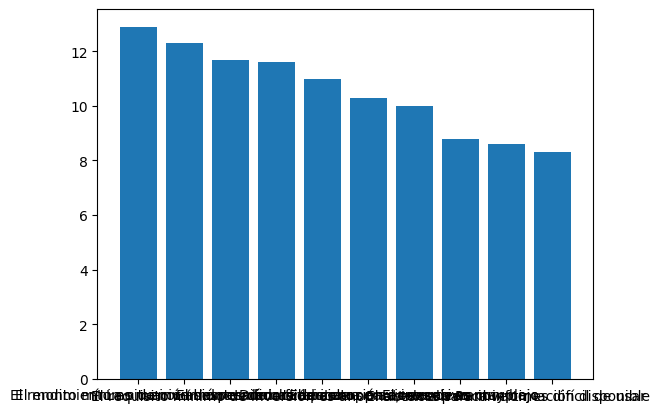

In [ ]:
#Un gráfico de barras con matplotlib

plt.bar(DATA['Opinión'], DATA['Porcentaje'])


<BarContainer object of 10 artists>

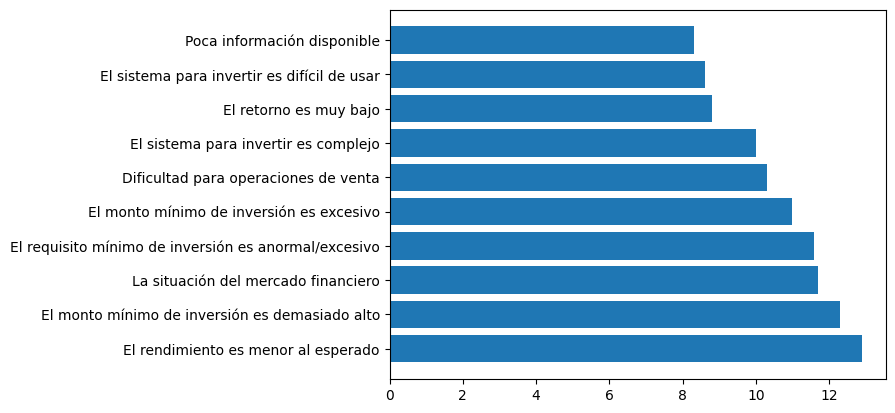

In [ ]:
#resulta mejor en este caso un grpafico de barras horizontales
plt.barh(DATA['Opinión'], DATA['Porcentaje'])


<BarContainer object of 10 artists>

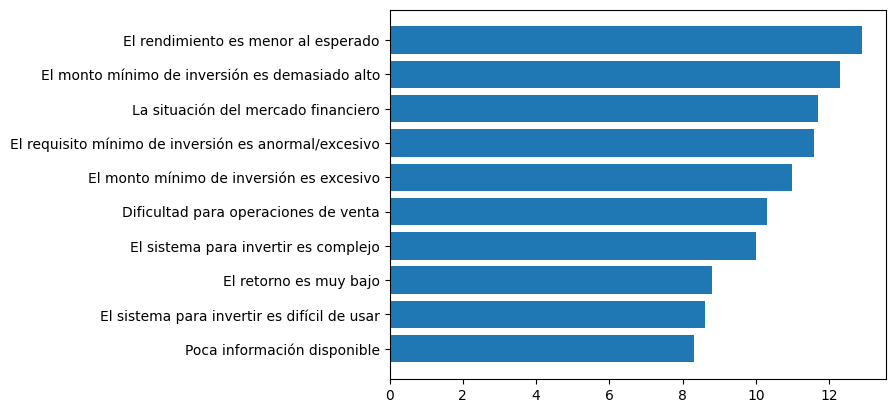

In [ ]:
#se ordenan los datos
DATA = DATA.sort_values(by='Porcentaje')

#se vuelve a graficar
plt.barh(DATA['Opinión'], DATA['Porcentaje'])



Ahora se comienza a trabajar sobre el formato para mejorar el gráfico según el objetivo buscado

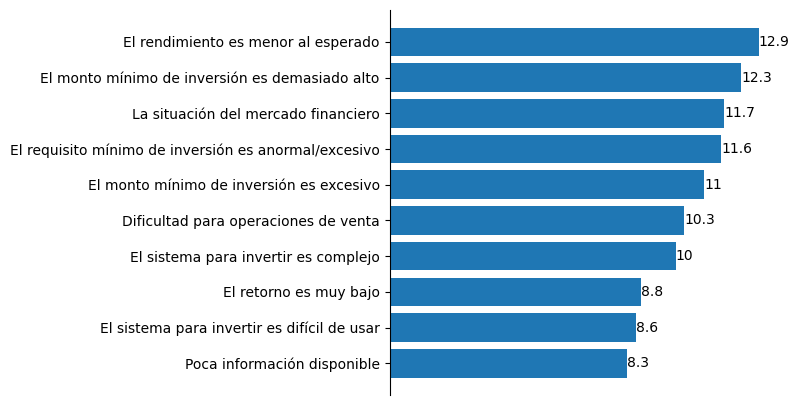

In [ ]:
#se ordenan los datos
DATA = DATA.sort_values(by='Porcentaje')

#se grafica
fig, ax = plt.subplots(figsize=(5,5)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)
bars=plt.barh(DATA['Opinión'], DATA['Porcentaje'])

#se elimina marcas y eje x
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.xaxis.set_visible(False)

# se agregan etiquetas en las barras
ax.bar_label(bars)

plt.show() #evita que aparezca el texto

Mejorando los aspectos estéticos

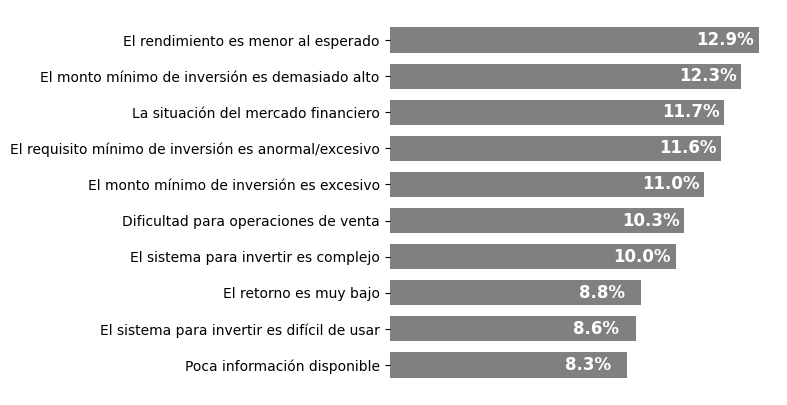

In [ ]:
#se ordenan los datos
DATA = DATA.sort_values(by='Porcentaje')

#se grafica
fig, ax = plt.subplots(figsize=(5,5)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)

bars=plt.barh(DATA['Opinión'], DATA['Porcentaje'], color='grey', height=0.7) #height es para modificar el espacio entre las barras

#se elimina marcas y ejes
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.xaxis.set_visible(False) #no mostrar eje x

#cambiar tamaño fuente etiqueta eje Y
plt.rc('ytick',labelsize=12)

#se formatea la etiqueta
ax.bar_label(bars, padding=-45, color='white',  #padding para al ubicación de la etiqueta
             fontsize=12, label_type='edge', fmt='%.1f%%', #fmt para el formato de decimales
            fontweight='bold')

plt.show() #evita que aparezca el texto

Destacando algunos casos

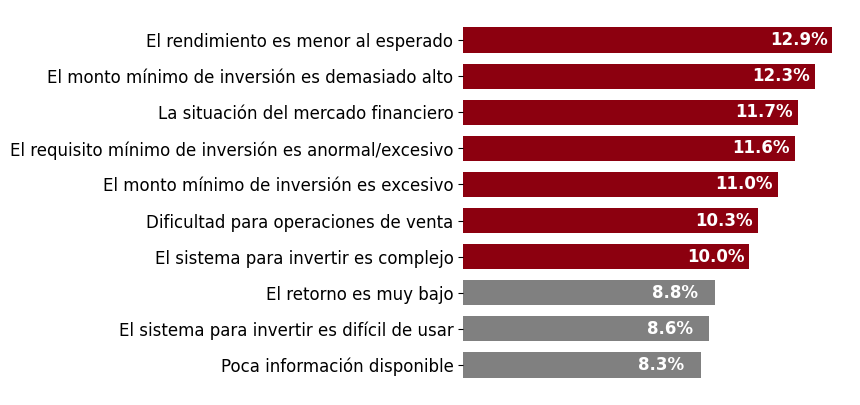

In [ ]:
#DESTACANDO LAS OPINIONES CON PORCENTAJE MAYOR IGUAL A 10%


CORTE_PORCENTAJE = 10
highlight_colour = '#8C000F'
non_highlight_colour = 'grey'

DATA['colours'] = DATA['Porcentaje'].apply(lambda x: highlight_colour if x >= CORTE_PORCENTAJE else non_highlight_colour)


#se ordenan los datos
DATA = DATA.sort_values(by='Porcentaje')

#se grafica
fig, ax = plt.subplots(figsize=(5,5)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)

bars=plt.barh(DATA['Opinión'], DATA['Porcentaje'], color=DATA['colours'], height=0.7) #height es para modificar el espacio entre las barras

#se elimina marcas y ejes
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.xaxis.set_visible(False) #no mostrar eje x

#cambiar tamaño fuente etiqueta eje Y
plt.rc('ytick',labelsize=12)

#se formatea la etiqueta
ax.bar_label(bars, padding=-45, color='white',  #padding para al ubicación de la etiqueta
             fontsize=12, label_type='edge', fmt='%.1f%%', #fmt para el formato de decimales
            fontweight='bold')

plt.show() #evita que aparezca el texto

Destacando determinados casos sobre otros y agregando comentario

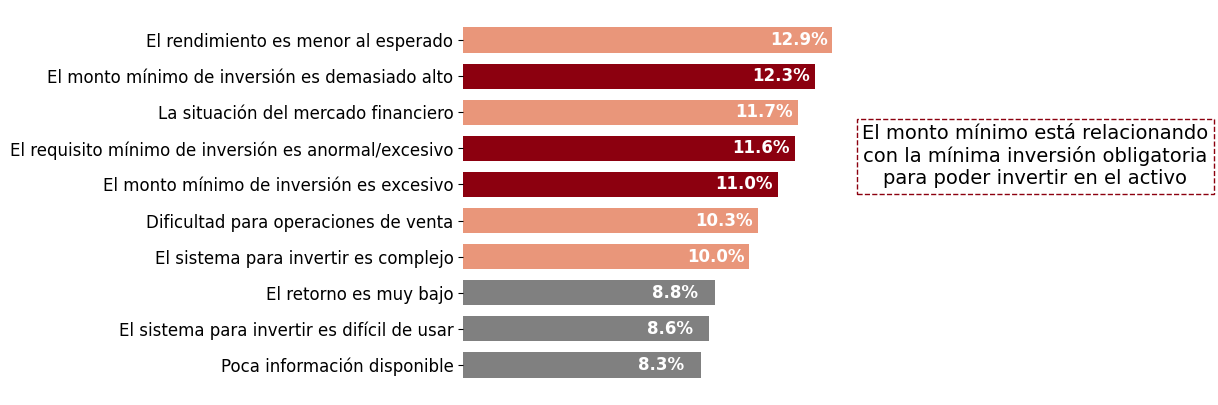

In [ ]:
#DESTACANDO LOS TRES CASOS CON "MONTO MÍNIMO"

for i, row in DATA.iterrows():
  if row.Porcentaje == 12.9  :
        DATA.at[i,'colours'] = 'darksalmon'
  elif row.Porcentaje >= 10.0 and row.Porcentaje <11.0:
        DATA.at[i,'colours'] = 'darksalmon'
  elif row.Porcentaje == 11.7 :
        DATA.at[i,'colours'] = 'darksalmon'

#se ordenan los datos
DATA = DATA.sort_values(by='Porcentaje')

#se grafica
fig, ax = plt.subplots(figsize=(5,5)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)

bars=plt.barh(DATA['Opinión'], DATA['Porcentaje'], color=DATA['colours'], height=0.7) #height es para modificar el espacio entre las barras

#se elimina marcas y ejes
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.xaxis.set_visible(False) #no mostrar eje x

#cambiar tamaño fuente etiqueta eje Y
plt.rc('ytick',labelsize=12)

#se formatea la etiqueta
ax.bar_label(bars, padding=-45, color='white',  #padding para al ubicación de la etiqueta
             fontsize=12, label_type='edge', fmt='%.1f%%', #fmt para el formato de decimales
            fontweight='bold')


#se agrega comentario

ax.text(x=20, y=5, s='El monto mínimo está relacionando'+'\n'+'con la mínima inversión obligatoria'+'\n' 'para poder invertir en el activo', ha='center',
        fontsize=14, bbox=dict(facecolor='white', edgecolor='#8C000F', ls='--'))

plt.show() #evita que aparezca el texto

Con Seaborn

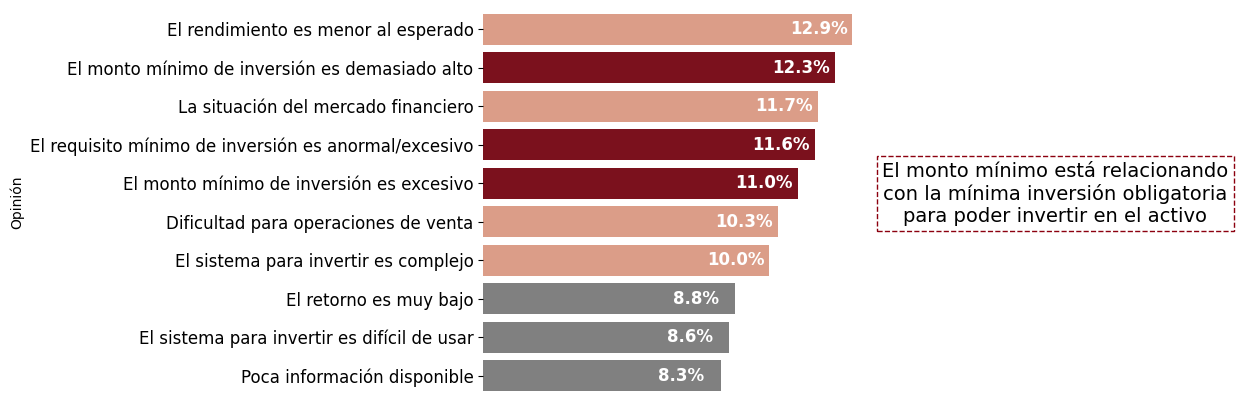

In [ ]:
f, ax = plt.subplots(figsize=(5,5))

DATA_1=DATA.sort_values(by='Porcentaje', ascending=False)

sns.barplot(x="Porcentaje", y="Opinión", data=DATA_1, palette=DATA_1['colours'])

for i in ax.containers:
    ax.bar_label(i,padding=-45, color='white',  #padding para al ubicación de la etiqueta
             fontsize=12, label_type='edge', fmt='%.1f%%', #fmt para el formato de decimales
            fontweight='bold')

#se elimina marcas y ejes
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.xaxis.set_visible(False) #no mostrar eje x

#cambiar tamaño fuente etiqueta eje Y
plt.rc('ytick',labelsize=12)


#se agrega comentario
ax.text(x=20, y=5, s='El monto mínimo está relacionando'+'\n'+'con la mínima inversión obligatoria'+'\n' 'para poder invertir en el activo', ha='center',
        fontsize=14, bbox=dict(facecolor='white', edgecolor='#8C000F', ls='--'))

plt.show() #evita que aparezca el texto

**Interacción**

In [ ]:
#se crea un dataframe

DATA=pd.DataFrame({'Opinión':['El rendimiento es menor al esperado', 'El monto mínimo de inversión es demasiado alto', 'La situación del mercado financiero',
                              'El requisito mínimo de inversión es anormal/excesivo', 'El monto mínimo de inversión es excesivo', 'Dificultad para operaciones de venta',
                              'El sistema para invertir es complejo', 'El retorno es muy bajo', 'El sistema para invertir es difícil de usar', 'Poca información disponible'],
                   'Porcentaje':[12.9, 12.3, 11.7, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.3],
                    'Comentario':['', 'El monto mínimo está relacionando con la mínima inversión obligatoria para poder invertir en el activo', '',
                                   'El monto mínimo está relacionando con la mínima inversión obligatoria para poder invertir en el activo',
                                   'El monto mínimo está relacionando con la mínima inversión obligatoria para poder invertir en el activo',
                                  '','','','','']
                  })
DATA

,Opinión,Porcentaje,Comentario
0,El rendimiento es menor al esperado,12.9,
1,El monto mínimo de inversión es demasiado alto,12.3,El monto mínimo está relacionando con la mínim...
2,La situación del mercado financiero,11.7,
3,El requisito mínimo de inversión es anormal/ex...,11.6,El monto mínimo está relacionando con la mínim...
4,El monto mínimo de inversión es excesivo,11.0,El monto mínimo está relacionando con la mínim...
5,Dificultad para operaciones de venta,10.3,
6,El sistema para invertir es complejo,10.0,
7,El retorno es muy bajo,8.8,
8,El sistema para invertir es difícil de usar,8.6,
9,Poca información disponible,8.3,


In [ ]:
#creación de los colores
CORTE_PORCENTAJE = 10
highlight_colour = '#8C000F'
non_highlight_colour = 'grey'

DATA['colours'] = DATA['Porcentaje'].apply(lambda x: highlight_colour if x >= CORTE_PORCENTAJE else non_highlight_colour)

for i, row in DATA.iterrows():
  if row.Porcentaje == 12.9  :
        DATA.at[i,'colours'] = 'darksalmon'
  elif row.Porcentaje >= 10.0 and row.Porcentaje <11.0:
        DATA.at[i,'colours'] = 'darksalmon'
  elif row.Porcentaje == 11.7 :
        DATA.at[i,'colours'] = 'darksalmon'

In [ ]:
#se ordenan los datos
DATA_2=DATA.sort_values(by='Porcentaje', ascending=True)
DATA_2

,Opinión,Porcentaje,Comentario,colours
9,Poca información disponible,8.3,,grey
8,El sistema para invertir es difícil de usar,8.6,,grey
7,El retorno es muy bajo,8.8,,grey
6,El sistema para invertir es complejo,10.0,,darksalmon
5,Dificultad para operaciones de venta,10.3,,darksalmon
4,El monto mínimo de inversión es excesivo,11.0,El monto mínimo está relacionando con la mínim...,#8C000F
3,El requisito mínimo de inversión es anormal/ex...,11.6,El monto mínimo está relacionando con la mínim...,#8C000F
2,La situación del mercado financiero,11.7,,darksalmon
1,El monto mínimo de inversión es demasiado alto,12.3,El monto mínimo está relacionando con la mínim...,#8C000F
0,El rendimiento es menor al esperado,12.9,,darksalmon


In [ ]:
fig=go.Figure(data=[go.Bar(x=DATA_2['Porcentaje'], y=DATA_2['Opinión'],marker_color=DATA_2['colours'], orientation='h',
                             text=DATA_2['Porcentaje'],textposition='auto',
                           hovertext=DATA_2['Comentario'])])

fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

fig.update_layout( title={'text': "Top 10 opiniones sobre inversión en un activo",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

In [ ]:
#quitando el fondo gris

fig=go.Figure(data=[go.Bar(x=DATA_2['Porcentaje'], y=DATA_2['Opinión'],marker_color=DATA_2['colours'], orientation='h',
                             text=DATA_2['Porcentaje'],textposition='auto',
                           hovertext=DATA_2['Comentario'])])

fig.update_traces(textfont_size=12, textangle=0, textposition="inside", cliponaxis=False)

fig.update_layout( title={'text': "Top 10 opiniones sobre inversión en un activo",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})


fig.update_layout(template='none')

fig.show()

In [ ]:
#mejoramos la dimensión del espacio de visualización

fig=go.Figure(data=[go.Bar(x=DATA_2['Porcentaje'], y=DATA_2['Opinión'],marker_color=DATA_2['colours'], orientation='h',
                             text=DATA_2['Porcentaje'],textposition='auto',
                           hovertext=DATA_2['Comentario'])])

fig.update_traces(textfont_size=14, textangle=0, textposition="inside", cliponaxis=False)

fig.update_layout( title={'text': "Top 10 opiniones sobre inversión en un activo en porcentaje",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})


fig.update_layout(template='none', margin=dict(l=400, r=20, t=100, b=20))  #l="Left", r="right", t="toop", b="botton"

fig.show()

# **Gráfico de barras agrupadas**

Obtención de los datos

https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information

Recuerde importar su json con credenciales de conexión a la API

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d paytonfisher/sp-500-companies-with-financial-information

sp-500-companies-with-financial-information.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/sp-500-companies-with-financial-information.zip

Archive:  /content/sp-500-companies-with-financial-information.zip
replace financials.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: financials.csv          


In [ ]:
DATA=pd.read_csv("/content/financials.csv")

 - 4 character variables:
        - Symbol: Ticker symbol used to uniquely identify each company on a particular stock market
        - Name: Legal name of the company
        - Sector: An area of the economy where businesses share a related product or service
        - SEC Filings: Helpful documents relating to a company

    - 10 numeric variables:
        - Price: Price per share of the company
        - Price to Earnings (PE): The ratio of a company’s share price to its earnings per share
        - Dividend Yield: The ratio of the annual dividends per share divided by the price per share
        - Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock
        - 52 week high and low: The annual high and low of a company’s share price
        - Market Cap: The market value of a company’s shares (calculated as share price x number of shares)
        - EBITDA: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability
        - Price to Sales (PS): A company’s market cap divided by its total sales or revenue over the past year
        - Price to Book (PB): A company’s price per share divided by its book value

In [ ]:
DATA.shape

(505, 14)

In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


Graficamos

In [ ]:
#medidas agregadas por Setcor
DATA_Sector=DATA.groupby(['Sector']).Price.agg(['count','mean', 'median']).reset_index()
DATA_Sector

,Sector,count,mean,median
0,Consumer Discretionary,84,124.034524,65.140
1,Consumer Staples,34,79.764118,69.750
2,Energy,32,57.887500,50.325
3,Financials,68,89.056029,71.105
4,Health Care,61,132.515738,96.420
5,Industrials,67,116.887612,87.600
6,Information Technology,70,119.242857,84.770
7,Materials,25,102.386800,105.180
8,Real Estate,33,88.712727,58.360
9,Telecommunication Services,3,33.603333,35.570


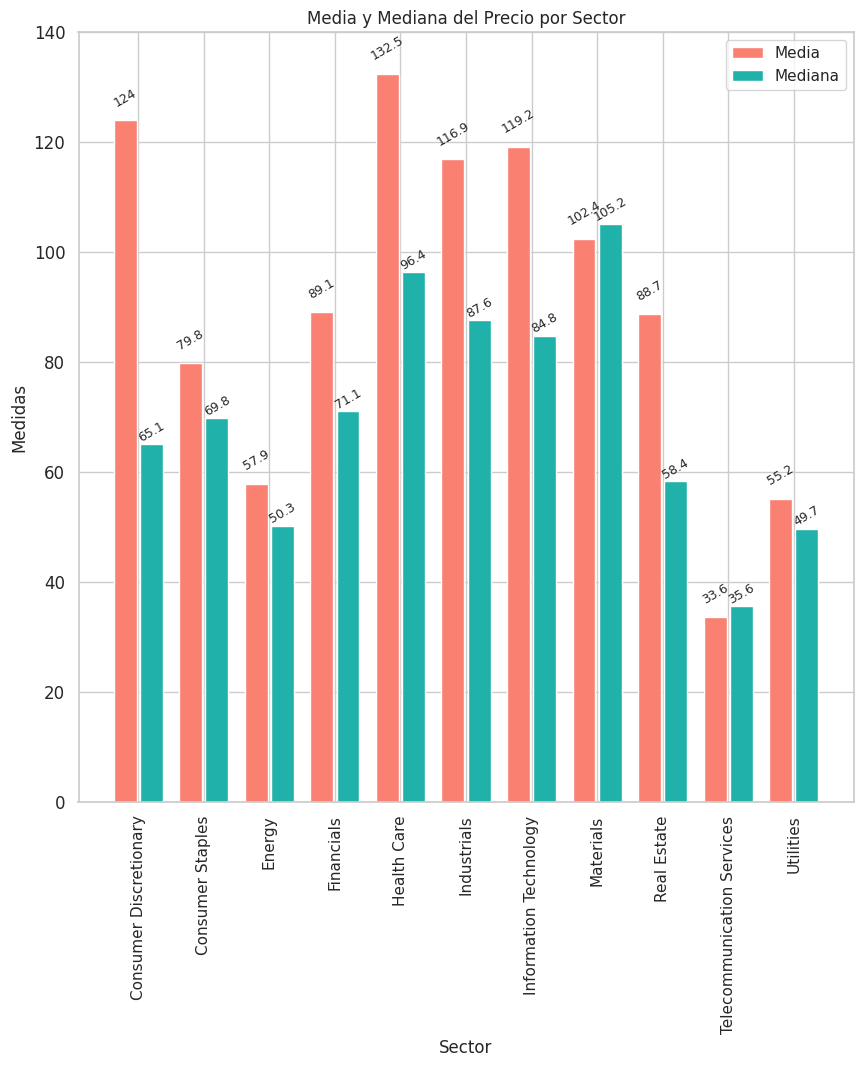

In [ ]:
#Precio medio y mediano por sector
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
x = np.arange(len(DATA_Sector))
bar1=plt.bar(x-0.20, round(DATA_Sector['mean'],1),  width=0.35, color='salmon') #width para ancho de la barra
bar2=plt.bar(x+0.20, round(DATA_Sector['median'],1),  width=0.35, color='lightseagreen')

ax.bar_label(bar1, fontsize=9,rotation=30, padding=8) #padding ubicación de la etiqueta de dato
ax.bar_label(bar2, fontsize=9,rotation=30)

plt.xticks(x, DATA_Sector['Sector'], rotation=90)
plt.xlabel("Sector")

plt.ylim(0,140)
plt.ylabel("Medidas")

plt.legend(["Media", "Mediana"])

ax.set_title('Media y Mediana del Precio por Sector')

plt.show()

Mejorarando la lectura de las etiquetas del eje x

In [ ]:
DATA_Sector['Sector'].unique()

array(['Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate',
       'Telecommunication Services', 'Utilities'], dtype=object)

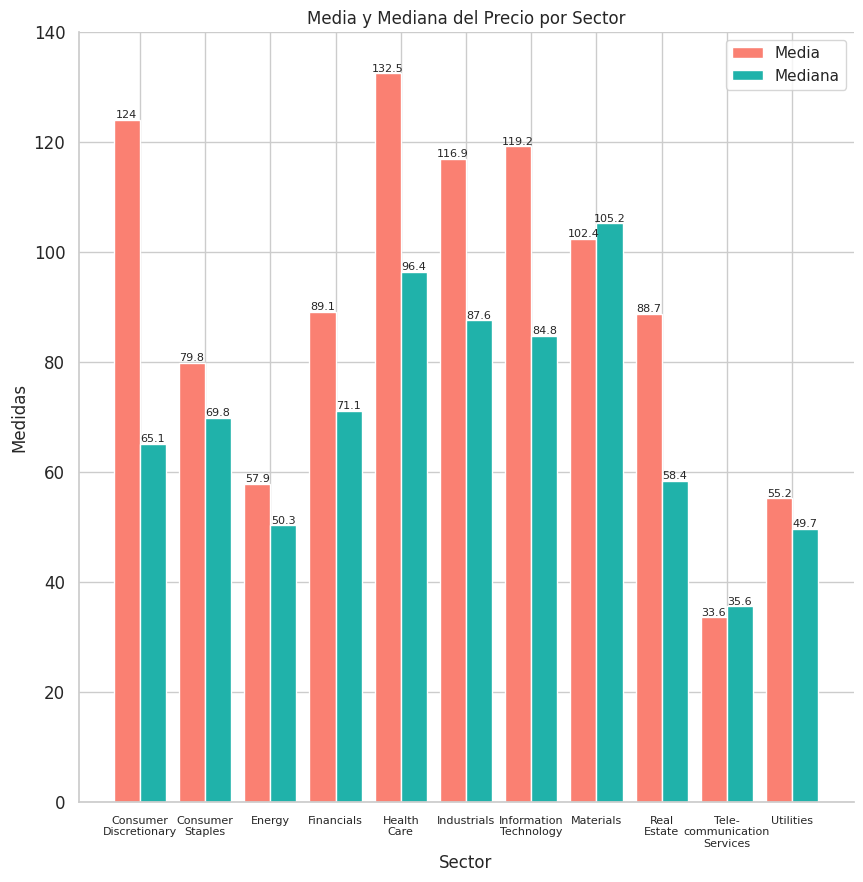

In [ ]:
#Precio medio y mediano por sector
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
ax.spines[['right', 'top']].set_visible(False)

x = np.arange(len(DATA_Sector))
bar1=plt.bar(x-0.20, round(DATA_Sector['mean'],1),  width=0.4, color='salmon') #width para ancho de la barra
bar2=plt.bar(x+0.20, round(DATA_Sector['median'],1),  width=0.4, color='lightseagreen')

ax.bar_label(bar1, fontsize=8,rotation=0, padding=0) #padding ubicación de la etiqueta de dato
ax.bar_label(bar2, fontsize=8,rotation=0, padding=0)

plt.xticks(x, ['Consumer'+'\n'+ 'Discretionary', 'Consumer'+'\n'+ 'Staples', 'Energy',
              'Financials', 'Health'+'\n'+ 'Care', 'Industrials',
              'Information'+'\n'+ 'Technology', 'Materials', 'Real'+'\n'+ 'Estate',
              'Tele-'+'\n'+'communication'+'\n'+ 'Services', 'Utilities'], rotation=0, fontsize=8)
plt.xlabel("Sector")

plt.ylim(0,140)
plt.ylabel("Medidas")

plt.legend(["Media", "Mediana"])

ax.set_title('Media y Mediana del Precio por Sector')

plt.show()

Con Seaborn

In [ ]:
DATA_Sector_1=DATA_Sector[['Sector', 'mean', 'median']].melt('Sector', var_name='medida', value_name='valor')

DATA_Sector_1

,Sector,medida,valor
0,Consumer Discretionary,mean,124.034524
1,Consumer Staples,mean,79.764118
2,Energy,mean,57.887500
3,Financials,mean,89.056029
4,Health Care,mean,132.515738
5,Industrials,mean,116.887612
6,Information Technology,mean,119.242857
7,Materials,mean,102.386800
8,Real Estate,mean,88.712727
9,Telecommunication Services,mean,33.603333


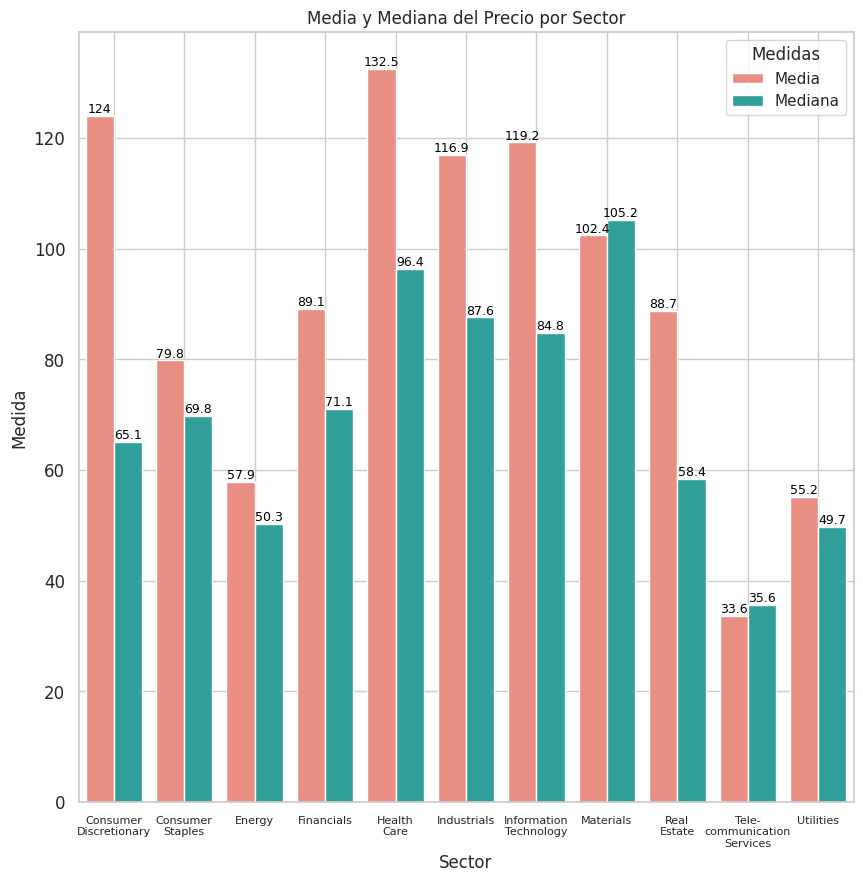

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='Sector', y=round(DATA_Sector_1['valor'],1), hue='medida', data=DATA_Sector_1, palette=['salmon','lightseagreen'])

for i in ax.containers:
    ax.bar_label(i, color='black',fontsize=9, label_type='edge')

x = np.arange(len(DATA_Sector))
plt.xticks(x, ['Consumer'+'\n'+ 'Discretionary', 'Consumer'+'\n'+ 'Staples', 'Energy',
              'Financials', 'Health'+'\n'+ 'Care', 'Industrials',
              'Information'+'\n'+ 'Technology', 'Materials', 'Real'+'\n'+ 'Estate',
              'Tele-'+'\n'+'communication'+'\n'+ 'Services', 'Utilities'], rotation=0, fontsize=8)
plt.xlabel("Sector")
plt.ylabel("Medida")

ax.legend(title='Medidas', loc='upper right',  facecolor='w', frameon = True,
          labels=['Media', 'Mediana'],
          handles=[tuple(bar_group) for bar_group in ax.containers])

ax.set_title('Media y Mediana del Precio por Sector')

plt.grid(True)

**Interacción**

In [ ]:
DATA_Sector.head()

,Sector,count,mean,median
0,Consumer Discretionary,84,124.034524,65.140
1,Consumer Staples,34,79.764118,69.750
2,Energy,32,57.887500,50.325
3,Financials,68,89.056029,71.105
4,Health Care,61,132.515738,96.420


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=DATA_Sector['Sector'],y=round(DATA_Sector['mean'],1),name='Media', marker_color='salmon',
                     text=round(DATA_Sector['mean'],1),textposition='outside', hovertext=DATA_Sector['count']))
fig.add_trace(go.Bar(x=DATA_Sector['Sector'],y=round(DATA_Sector['median'],1),name='Mediana', marker_color='lightseagreen',
                     text=round(DATA_Sector['median'],1),textposition='outside', hovertext=DATA_Sector['count']))

fig.update_layout(barmode='group', xaxis_tickangle=30)

fig.update_layout(title={'text': 'Media y Mediana del Precio por Sector','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})


fig.show()

# **Gráfico de barra apiladas**

In [ ]:
#Obtención de datos
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
VISA = pd.DataFrame(pdr.get_data_yahoo('V', start='2023-07-21', end='2023-08-01')).reset_index()
AMX = pd.DataFrame(pdr.get_data_yahoo('AXP', start='2023-07-21', end='2023-08-01')).reset_index()
MTC = pd.DataFrame(pdr.get_data_yahoo('MA', start='2023-07-21', end='2023-08-01')).reset_index()
DATA_YAHOO=pd.concat([VISA['Date'], VISA['Volume'], AMX['Volume'], MTC['Volume']], axis=1)
DATA_YAHOO.columns=['Fecha',  'VISA_V', 'AMX_V', 'MTC_V']
DATA_YAHOO

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Fecha,VISA_V,AMX_V,MTC_V
0,2023-07-21,5426800,9098400,1868100
1,2023-07-24,6010000,4979900,3029800
2,2023-07-25,4997500,3286700,2490500
3,2023-07-26,7551400,2352000,2572300
4,2023-07-27,8160100,3944200,3563300
5,2023-07-28,6794800,2925900,4501000
6,2023-07-31,4799600,3345900,3578300


In [ ]:
DATA_YAHOO['Prop_VISA']=round(DATA_YAHOO['VISA_V']/(DATA_YAHOO['VISA_V']+DATA_YAHOO['AMX_V']+DATA_YAHOO['MTC_V']),1)*100
DATA_YAHOO['Prop_AMX']=round(DATA_YAHOO['AMX_V']/(DATA_YAHOO['VISA_V']+DATA_YAHOO['AMX_V']+DATA_YAHOO['MTC_V']),1)*100
DATA_YAHOO['Prop_MTC']=round(DATA_YAHOO['MTC_V']/(DATA_YAHOO['VISA_V']+DATA_YAHOO['AMX_V']+DATA_YAHOO['MTC_V']),1)*100

In [ ]:
DATA_YAHOO_1=DATA_YAHOO[['Fecha', 'Prop_VISA', 'Prop_AMX', 'Prop_MTC']]
DATA_YAHOO_1['Fecha']=DATA_YAHOO_1['Fecha'].dt.strftime('%Y-%m-%d')
DATA_YAHOO_1=DATA_YAHOO_1.set_index('Fecha')
DATA_YAHOO_1

,Prop_VISA,Prop_AMX,Prop_MTC
Fecha,,,
2023-07-21,30.0,60.0,10.0
2023-07-24,40.0,40.0,20.0
2023-07-25,50.0,30.0,20.0
2023-07-26,60.0,20.0,20.0
2023-07-27,50.0,30.0,20.0
2023-07-28,50.0,20.0,30.0
2023-07-31,40.0,30.0,30.0


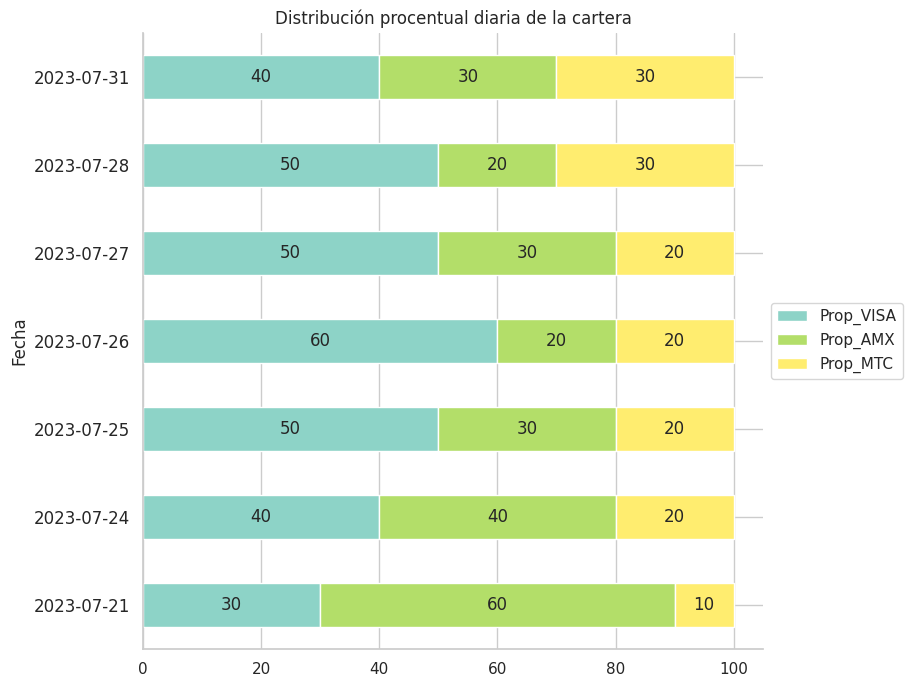

In [ ]:
#graficamos
ax = DATA_YAHOO_1.plot.barh(stacked=True, cmap='Set3', figsize=(8, 8))

for c in ax.containers:
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

ax.spines[[ "top", "right"]].set_visible(False)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.set_title('Distribución procentual diaria de la cartera')

plt.show()

Con Seaborn

In [ ]:
DATA_YAHOO.head()

,Fecha,VISA_V,AMX_V,MTC_V,Prop_VISA,Prop_AMX,Prop_MTC
0,2023-07-21,5426800,9098400,1868100,30.0,60.0,10.0
1,2023-07-24,6010000,4979900,3029800,40.0,40.0,20.0
2,2023-07-25,4997500,3286700,2490500,50.0,30.0,20.0
3,2023-07-26,7551400,2352000,2572300,60.0,20.0,20.0
4,2023-07-27,8160100,3944200,3563300,50.0,30.0,20.0


In [ ]:
DATA_YAHOO_2=DATA_YAHOO[['Fecha', 'Prop_VISA', 'Prop_AMX', 'Prop_MTC']].melt('Fecha', var_name='medida', value_name='valor')

DATA_YAHOO_2

,Fecha,medida,valor
0,2023-07-21,Prop_VISA,30.0
1,2023-07-24,Prop_VISA,40.0
2,2023-07-25,Prop_VISA,50.0
3,2023-07-26,Prop_VISA,60.0
4,2023-07-27,Prop_VISA,50.0
5,2023-07-28,Prop_VISA,50.0
6,2023-07-31,Prop_VISA,40.0
7,2023-07-21,Prop_AMX,60.0
8,2023-07-24,Prop_AMX,40.0
9,2023-07-25,Prop_AMX,30.0


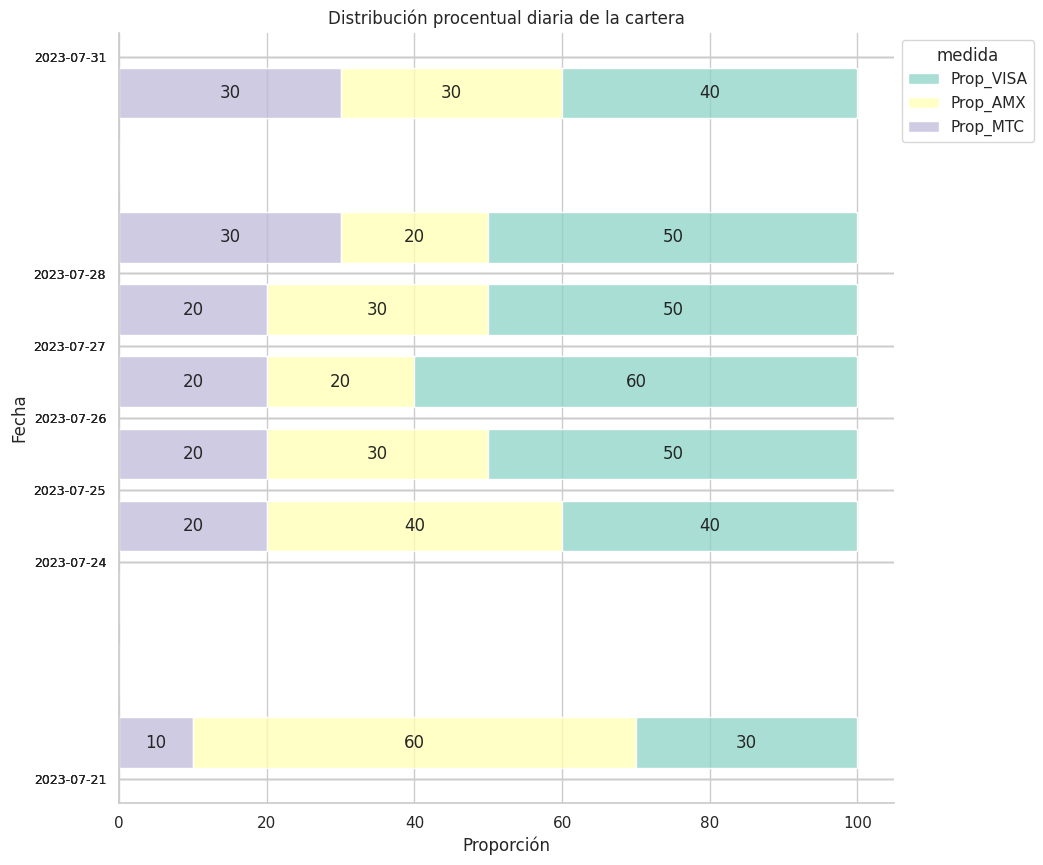

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(DATA_YAHOO_2, y='Fecha', hue='medida', weights='valor', multiple='stack', palette='Set3',shrink=0.7)
for c in ax.containers:
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)

ax.set_xlabel('Proporción')
ax.set_ylabel('Fecha')
ticks = list(DATA_YAHOO_2['Fecha'])
plt.yticks(ticks,rotation=0, fontsize=9)

legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

ax.spines[[ "top", "right"]].set_visible(False)

ax.set_title('Distribución procentual diaria de la cartera')

plt.show()


**Interacción**

In [ ]:
DATA_YAHOO.head()

,Fecha,VISA_V,AMX_V,MTC_V,Prop_VISA,Prop_AMX,Prop_MTC
0,2023-07-21,5426800,9098400,1868100,30.0,60.0,10.0
1,2023-07-24,6010000,4979900,3029800,40.0,40.0,20.0
2,2023-07-25,4997500,3286700,2490500,50.0,30.0,20.0
3,2023-07-26,7551400,2352000,2572300,60.0,20.0,20.0
4,2023-07-27,8160100,3944200,3563300,50.0,30.0,20.0


In [ ]:

fig = go.Figure(data=[
    go.Bar(name='Prop_VISA', x=DATA_YAHOO['Prop_VISA'], y=DATA_YAHOO['Fecha'], orientation='h',text=DATA_YAHOO['Prop_VISA'],
           textposition='inside', insidetextanchor="middle", marker_color='plum'),
    go.Bar(name='Prop_AMX', x=DATA_YAHOO['Prop_AMX'], y=DATA_YAHOO['Fecha'],orientation='h', text=DATA_YAHOO['Prop_AMX'],
           textposition='inside', insidetextanchor="middle", marker_color='lemonchiffon'),
    go.Bar(name='Prop_MTC', x=DATA_YAHOO['Prop_MTC'], y=DATA_YAHOO['Fecha'], orientation='h',text=DATA_YAHOO['Prop_MTC'],
           textposition='inside', insidetextanchor="middle", marker_color='darkseagreen')
])

fig.update_layout(barmode='stack')

fig.update_layout(dict(yaxis = dict( type='date', tickformat="%Y-%m-%d",range = ['2023-07-20','2023-08-1'],nticks=20)))

fig.update_layout(title={'text': 'Distribución porcentual diaria de la cartera','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})


fig.show()

# **Gráfico de barra divergente**

In [ ]:
#obtención de datos
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
VISA = pd.DataFrame(pdr.get_data_yahoo('V', start='2023-07-21', end='2023-08-01')).reset_index()
VISA

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-21,239.740005,240.350006,238.729996,239.250000,238.800949,5426800
1,2023-07-24,239.679993,241.279999,238.190002,240.740005,240.288162,6010000
2,2023-07-25,240.020004,240.800003,238.559998,238.690002,238.242004,4997500
3,2023-07-26,231.419998,238.850006,227.679993,237.100006,236.654999,7551400
4,2023-07-27,237.419998,238.660004,232.960007,234.440002,233.999985,8160100
5,2023-07-28,234.580002,235.880005,233.710007,235.750000,235.307526,6794800
6,2023-07-31,236.000000,238.419998,236.000000,237.729996,237.283798,4799600


In [ ]:
VISA_1=VISA[['Date', 'Open', 'Adj Close']]
VISA_1

,Date,Open,Adj Close
0,2023-07-21,239.740005,238.800949
1,2023-07-24,239.679993,240.288162
2,2023-07-25,240.020004,238.242004
3,2023-07-26,231.419998,236.654999
4,2023-07-27,237.419998,233.999985
5,2023-07-28,234.580002,235.307526
6,2023-07-31,236.000000,237.283798


In [ ]:
VISA_1.dtypes

Date         datetime64[ns]
Open                float64
Adj Close           float64
dtype: object

In [ ]:
#cálculo de variación diaria absoluta y porcentual
VISA_1['Var_Diaria']=round(VISA['Adj Close']-VISA['Open'],1)
VISA_1['Var%_Diaria']=round(((VISA['Adj Close']-VISA['Open'])/VISA['Open'])*100, 1)
VISA_1

,Date,Open,Adj Close,Var_Diaria,Var%_Diaria
0,2023-07-21,239.740005,238.800949,-0.9,-0.4
1,2023-07-24,239.679993,240.288162,0.6,0.3
2,2023-07-25,240.020004,238.242004,-1.8,-0.7
3,2023-07-26,231.419998,236.654999,5.2,2.3
4,2023-07-27,237.419998,233.999985,-3.4,-1.4
5,2023-07-28,234.580002,235.307526,0.7,0.3
6,2023-07-31,236.000000,237.283798,1.3,0.5


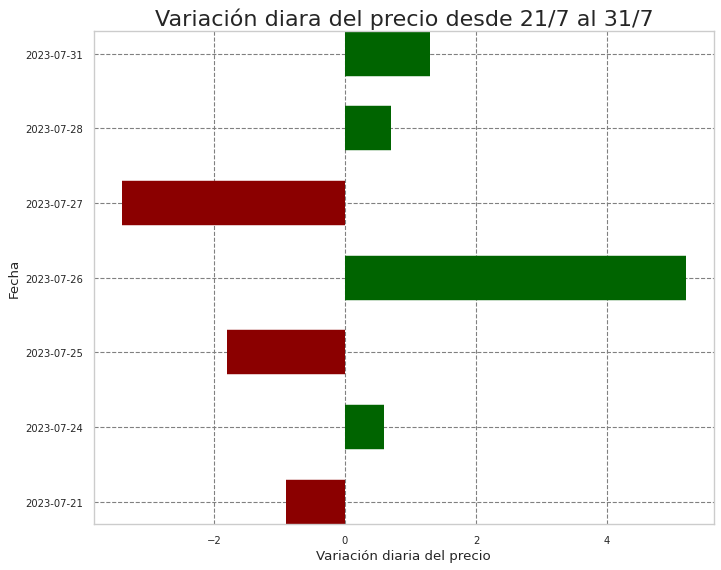

In [ ]:
fig, ax = plt.subplots(figsize=(10,8), dpi=80)

sns.set_style("whitegrid")

for i in range(35):
    # rojo si la variación es negativa< 0 y verde en otro caso
    VISA_1['colors'] = ['darkred' if float(x) < 0 else 'darkgreen' for x in VISA_1['Var_Diaria']]

# Para agregar linas horizontales
plt.hlines(y=VISA_1.index, xmin=0, xmax=VISA_1.Var_Diaria,color=VISA_1.colors, alpha=1, linewidth=40)

plt.gca().set(ylabel='Fecha', xlabel='Variación diaria del precio')
plt.yticks(VISA_1.index, VISA_1.Date.dt.strftime('%Y-%m-%d'), fontsize=9)
plt.xticks(fontsize=9)

plt.title('Variación diara del precio desde 21/7 al 31/7', fontdict={'size': 20})

plt.grid(linestyle='--', alpha=1, color='grey')

plt.show()

Con Seaborn

In [ ]:
VISA_2=VISA_1
VISA_2

,Date,Open,Adj Close,Var_Diaria,Var%_Diaria,colors
0,2023-07-21,239.740005,238.800949,-0.9,-0.4,darkred
1,2023-07-24,239.679993,240.288162,0.6,0.3,darkgreen
2,2023-07-25,240.020004,238.242004,-1.8,-0.7,darkred
3,2023-07-26,231.419998,236.654999,5.2,2.3,darkgreen
4,2023-07-27,237.419998,233.999985,-3.4,-1.4,darkred
5,2023-07-28,234.580002,235.307526,0.7,0.3,darkgreen
6,2023-07-31,236.000000,237.283798,1.3,0.5,darkgreen


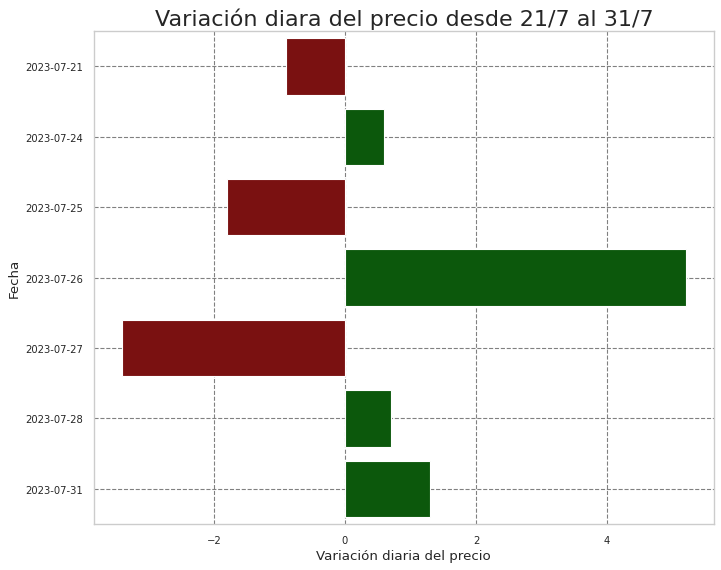

In [ ]:
import warnings
warnings.filterwarnings('ignore') #oculatar texto warning

fig, ax = plt.subplots(figsize=(10,8), dpi=80)

sns.set_style("whitegrid")

for i in range(7):
    # rojo si la variación es negativa< 0 y verde en otro caso
    VISA_2['colors'] = ['darkred' if float(x) < 0 else 'darkgreen' for x in VISA_2['Var_Diaria']]

sns.barplot(x=VISA_2['Var_Diaria'].values,y=VISA_2['Date'].values, palette =VISA_2['colors'])

plt.gca().set(ylabel='Fecha', xlabel='Variación diaria del precio')
plt.yticks(VISA_2.index, VISA_2.Date.dt.strftime('%Y-%m-%d'), fontsize=9)
plt.xticks(fontsize=9)
plt.title('Variación diara del precio desde 21/7 al 31/7', fontdict={'size': 20})

plt.grid(linestyle='--', alpha=1, color='grey')

plt.show()

**Interacción**

In [ ]:
VISA_2

,Date,Open,Adj Close,Var_Diaria,Var%_Diaria,colors
0,2023-07-21,239.740005,238.800949,-0.9,-0.4,darkred
1,2023-07-24,239.679993,240.288162,0.6,0.3,darkgreen
2,2023-07-25,240.020004,238.242004,-1.8,-0.7,darkred
3,2023-07-26,231.419998,236.654999,5.2,2.3,darkgreen
4,2023-07-27,237.419998,233.999985,-3.4,-1.4,darkred
5,2023-07-28,234.580002,235.307526,0.7,0.3,darkgreen
6,2023-07-31,236.000000,237.283798,1.3,0.5,darkgreen


In [ ]:
fig=go.Figure(data=[go.Bar(x=VISA_2['Var_Diaria'], y=VISA_2['Date'],marker_color=VISA_2['colors'], orientation='h',
                             text=VISA_2['Var_Diaria'],textposition='auto',hovertext=VISA_2['Var%_Diaria'])])

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.update_layout(dict(yaxis = dict(type='date', tickformat="%Y-%m-%d",range = ['2023-07-20','2023-08-1'],nticks=20)))

fig.update_layout(title={'text': 'Variación diara porcentual del precio desde 21/7 al 31/7','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

# **Gráfico de Mosaico**


In [ ]:
DATA=pd.read_csv("/content/financials.csv")

In [ ]:
DATA_Sector=DATA.groupby(['Sector']).Price.agg(['count']).reset_index()
DATA_Sector

,Sector,count
0,Consumer Discretionary,84
1,Consumer Staples,34
2,Energy,32
3,Financials,68
4,Health Care,61
5,Industrials,67
6,Information Technology,70
7,Materials,25
8,Real Estate,33
9,Telecommunication Services,3


In [ ]:
#cálculo distribución porcentual
DATA_Sector['Porc']=round(DATA_Sector['count']/DATA_Sector['count'].sum(),3)
DATA_Sector

,Sector,count,Porc
0,Consumer Discretionary,84,0.166
1,Consumer Staples,34,0.067
2,Energy,32,0.063
3,Financials,68,0.135
4,Health Care,61,0.121
5,Industrials,67,0.133
6,Information Technology,70,0.139
7,Materials,25,0.050
8,Real Estate,33,0.065
9,Telecommunication Services,3,0.006


In [ ]:
# ordenar los valores de menor a mayor el procentaje
DATA_Sector.sort_values('Porc', inplace=True)

# Reseatear el índice
DATA_Sector.reset_index(drop=True, inplace=True)

DATA_Sector

,Sector,count,Porc
0,Telecommunication Services,3,0.006
1,Materials,25,0.050
2,Utilities,28,0.055
3,Energy,32,0.063
4,Real Estate,33,0.065
5,Consumer Staples,34,0.067
6,Health Care,61,0.121
7,Industrials,67,0.133
8,Financials,68,0.135
9,Information Technology,70,0.139


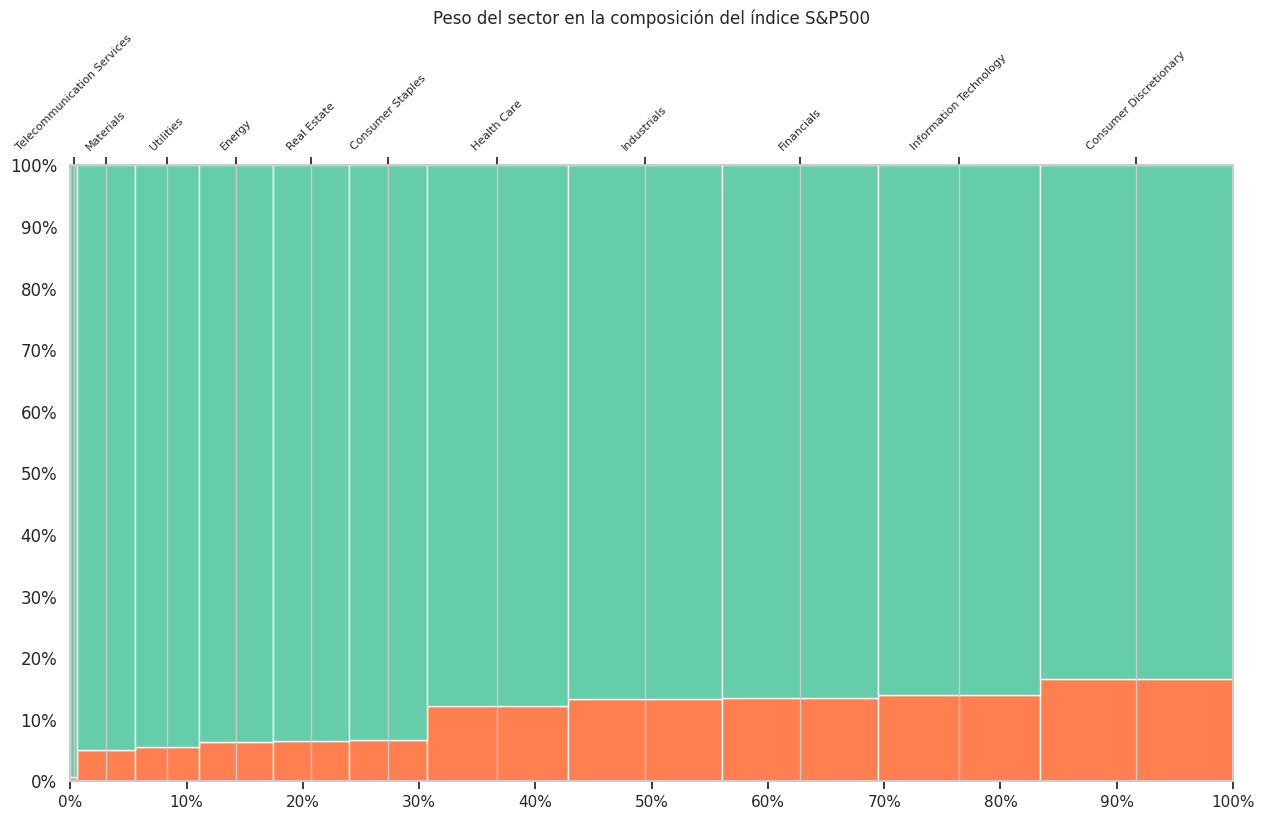

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
y = DATA_Sector['Porc']
x = DATA_Sector['count']
x_label = DATA_Sector['Sector']
width = [i/sum(x) for i in x]

# cálculo de coordenadas
adjusted_x, temp = [0], 0
for i in width[:-1]:
    temp += i
    adjusted_x.append(temp)

# Gráfico
plt.bar(adjusted_x, y, width=width, align='edge', edgecolor='white', color='coral')
plt.bar(adjusted_x, np.ones(len(y))-y, bottom=y, width=width, align='edge', edgecolor='white', color='mediumaquamarine')

# x and y ticks (%)
ax.set_yticks([0, 0.1, 0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%' , '100%'])
ax.set_xticks([0, 0.1, 0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1])
ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%' , '100%'])

plt.ylim(0,1)
plt.xlim(0,1)

# agregando las categorías en la parte superior
axy = ax.twiny()
axy.set_xticks([(width[i]/2)+ v for i, v in enumerate(adjusted_x)])
axy.set_xticklabels(x_label, fontsize=8, rotation=45)

plt.title('Peso del sector en la composición del índice S&P500')

plt.show()

**Interacción**

In [ ]:
DATA_Sector_1=DATA_Sector[['Sector', 'count']]

In [ ]:
DATA_Sector_1['Resto']=100-DATA_Sector_1['count']

In [ ]:
DATA_Sector_1.head()

,Sector,count,Resto
0,Telecommunication Services,3,97
1,Materials,25,75
2,Utilities,28,72
3,Energy,32,68
4,Real Estate,33,67


In [ ]:
labels

['30', '', '', '40', '50', '60', '50', '50', '', '40']

In [ ]:
import plotly.graph_objects as go
import numpy as np

labels = DATA_Sector_1["Sector"].to_list()
widths = np.array(DATA_Sector_1['count'])

fig = go.Figure()
for key in DATA_Sector_1[['count', 'Resto']]:
    fig.add_trace(go.Bar(
        name=key,
        y=DATA_Sector_1[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*DATA_Sector_1[key]]),
        texttemplate="%{y} x %{width} =<br>%{customdata[1]}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)

#fig.update_xaxes(range=[0,100])
#fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Peso del sector en la composición del índice S&P500",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

# **Treemap**


**Treemap simple**

In [ ]:
DATA_Sector=DATA.groupby(['Sector']).Price.agg(['count']).index.get_level_values(0).tolist()
DATA_Sector

['Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Telecommunication Services',
 'Utilities']

In [ ]:
DATA_Cantemp=DATA.groupby(['Sector'])[['Price']].count().reset_index().Price.values.tolist()
DATA_Cantemp

[84, 34, 32, 68, 61, 67, 70, 25, 33, 3, 28]

In [ ]:
!pip install squarify

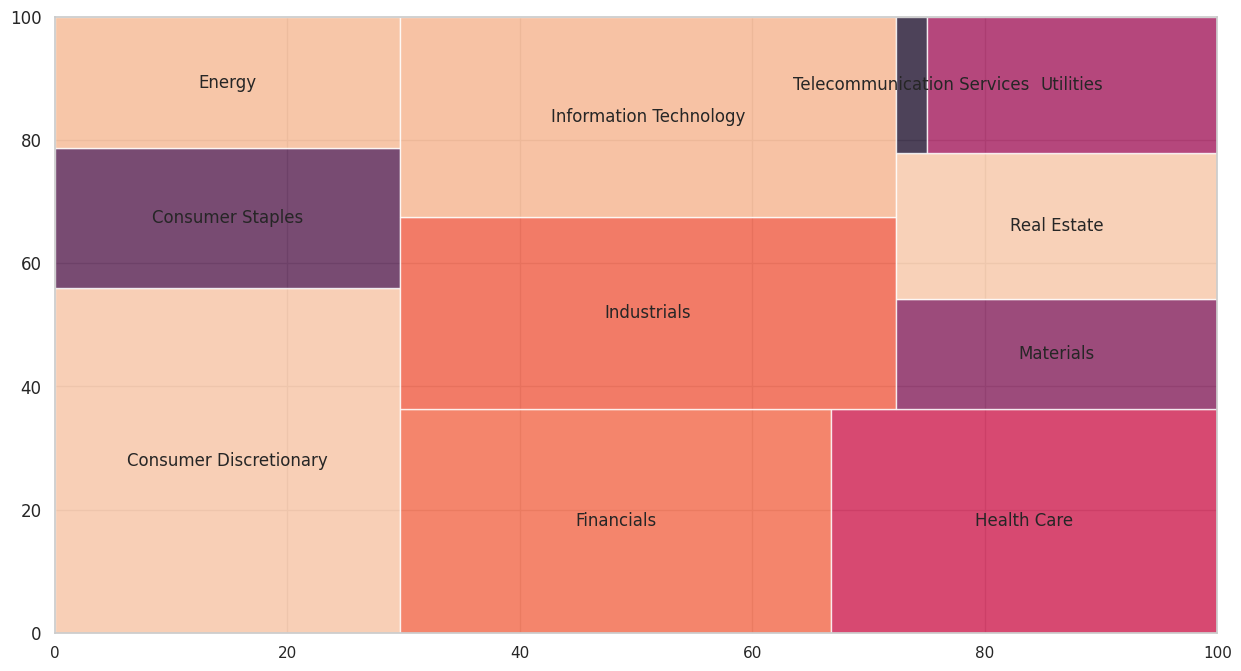

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
import squarify
squarify.plot(sizes=DATA_Cantemp, label=DATA_Sector, alpha=.8) #alpha para el color
#plt.axis('off') si se quiere quitar los ejes
plt.show()

**Treemap Multinivel Iteractivo**

In [ ]:
DATA.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
fig = px.treemap(DATA,
                 path = [px.Constant("S&P500"),"Sector","Symbol"],
                 values = "Market Cap",
                 color = "Dividend Yield",
                 hover_data = ["Name"],
                 color_continuous_scale = "RdBu",
                 color_continuous_midpoint = np.average(DATA["Dividend Yield"],weights = DATA["Market Cap"]))
fig.update_layout(margin = dict(t = 50,l = 25, r = 25, b = 25))
fig.show()

# **Mapa de calor**

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Datos_GOOG = pd.DataFrame(pdr.get_data_yahoo('GOOGL', start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_GOOG=Datos_GOOG.assign(SYMBOL_YAHOO_FINANCE='T_GOOG')
Datos_AMZN = pd.DataFrame(pdr.get_data_yahoo('AMZN',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_AMZN=Datos_AMZN.assign(SYMBOL_YAHOO_FINANCE='T_AMZN')
Datos_MSFT = pd.DataFrame(pdr.get_data_yahoo('MSFT',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_MSFT=Datos_MSFT.assign(SYMBOL_YAHOO_FINANCE='T_MSFT')

Datos_JPM = pd.DataFrame(pdr.get_data_yahoo('JPM',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_JPM=Datos_JPM.assign(SYMBOL_YAHOO_FINANCE='B_JPM')
Datos_BAC = pd.DataFrame(pdr.get_data_yahoo('BAC',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_BAC=Datos_BAC.assign(SYMBOL_YAHOO_FINANCE='B_BAC')
Datos_HSBC = pd.DataFrame(pdr.get_data_yahoo('HSBC',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_HSBC=Datos_HSBC.assign(SYMBOL_YAHOO_FINANCE='B_HSBC')

Datos_EXXON = pd.DataFrame(pdr.get_data_yahoo('XOM',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_EXXON=Datos_EXXON.assign(SYMBOL_YAHOO_FINANCE='E_XOM')
Datos_CHEV = pd.DataFrame(pdr.get_data_yahoo('CVX',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_CHEV=Datos_CHEV.assign(SYMBOL_YAHOO_FINANCE='E_CVX')
Datos_SHEL = pd.DataFrame(pdr.get_data_yahoo('SHEL',  start='2023-07-1', end='2023-08-01')[['Open','Close']]).reset_index()
Datos_SHEL=Datos_SHEL.assign(SYMBOL_YAHOO_FINANCE='E_SHEL')


#GENERACIÓN DE UN SOLO DATAFRAME
DATA_YAHOO=Datos_GOOG.append([Datos_AMZN, Datos_MSFT,Datos_JPM,Datos_BAC,Datos_HSBC,Datos_EXXON,Datos_CHEV,Datos_SHEL])
#RESETEO DE INDICE
DATA_YAHOO.reset_index(drop=True, inplace=True)
DATA_YAHOO

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,Open,Close,SYMBOL_YAHOO_FINANCE
0,2023-07-03,119.239998,119.900002,T_GOOG
1,2023-07-05,119.239998,121.750000,T_GOOG
2,2023-07-06,119.800003,120.110001,T_GOOG
3,2023-07-07,120.099998,119.480003,T_GOOG
4,2023-07-10,118.300003,116.449997,T_GOOG
...,...,...,...,...
175,2023-07-25,62.669998,63.029999,E_SHEL
176,2023-07-26,62.320000,62.619999,E_SHEL
177,2023-07-27,61.590000,60.799999,E_SHEL
178,2023-07-28,60.810001,60.939999,E_SHEL


In [ ]:
DATA_YAHOO['Variación_porc']=round((DATA_YAHOO['Close']-DATA_YAHOO['Open'])/DATA_YAHOO['Open'],3)*100
DATA_YAHOO

,Date,Open,Close,SYMBOL_YAHOO_FINANCE,Variación_porc
0,2023-07-03,119.239998,119.900002,T_GOOG,0.6
1,2023-07-05,119.239998,121.750000,T_GOOG,2.1
2,2023-07-06,119.800003,120.110001,T_GOOG,0.3
3,2023-07-07,120.099998,119.480003,T_GOOG,-0.5
4,2023-07-10,118.300003,116.449997,T_GOOG,-1.6
...,...,...,...,...,...
175,2023-07-25,62.669998,63.029999,E_SHEL,0.6
176,2023-07-26,62.320000,62.619999,E_SHEL,0.5
177,2023-07-27,61.590000,60.799999,E_SHEL,-1.3
178,2023-07-28,60.810001,60.939999,E_SHEL,0.2


In [ ]:
#crear una tabla pivot
df1 = DATA_YAHOO[['SYMBOL_YAHOO_FINANCE','Date','Variación_porc']]
df1['Date']=df1['Date'].dt.strftime('%Y-%m-%d')
x = pd.DataFrame(df1['Date'].unique())
heatmap_pt = pd.pivot_table(df1,values ='Variación_porc', index=['Date'], columns='SYMBOL_YAHOO_FINANCE')
heatmap_pt

SYMBOL_YAHOO_FINANCE,B_BAC,B_HSBC,B_JPM,E_CVX,E_SHEL,E_XOM,T_AMZN,T_GOOG,T_MSFT
Date,,,,,,,,,
2023-07-03,1.7,0.3,0.3,0.0,-0.7,0.0,-0.5,0.6,-0.4
2023-07-05,-0.2,-0.2,-0.2,-0.9,-1.4,-0.7,0.1,2.1,0.9
2023-07-06,-1.8,-0.5,0.1,-1.5,-0.6,-2.1,0.1,0.3,1.2
2023-07-07,0.8,0.7,0.3,1.4,1.8,1.2,0.9,-0.5,-0.6
2023-07-10,0.2,0.3,0.4,0.9,0.3,1.7,-1.5,-1.6,-0.8
2023-07-11,1.3,0.1,0.7,1.4,1.1,0.7,0.8,0.7,0.4
2023-07-12,-0.5,0.6,0.5,0.3,-0.5,-0.5,0.4,0.1,0.2
2023-07-13,0.5,0.1,0.1,-1.5,-0.3,-1.3,0.2,3.0,0.9
2023-07-14,-3.0,-0.5,-1.2,-2.2,-2.6,-3.0,0.5,0.5,-0.7


In [ ]:
heatmap_pt.shape

(20, 9)

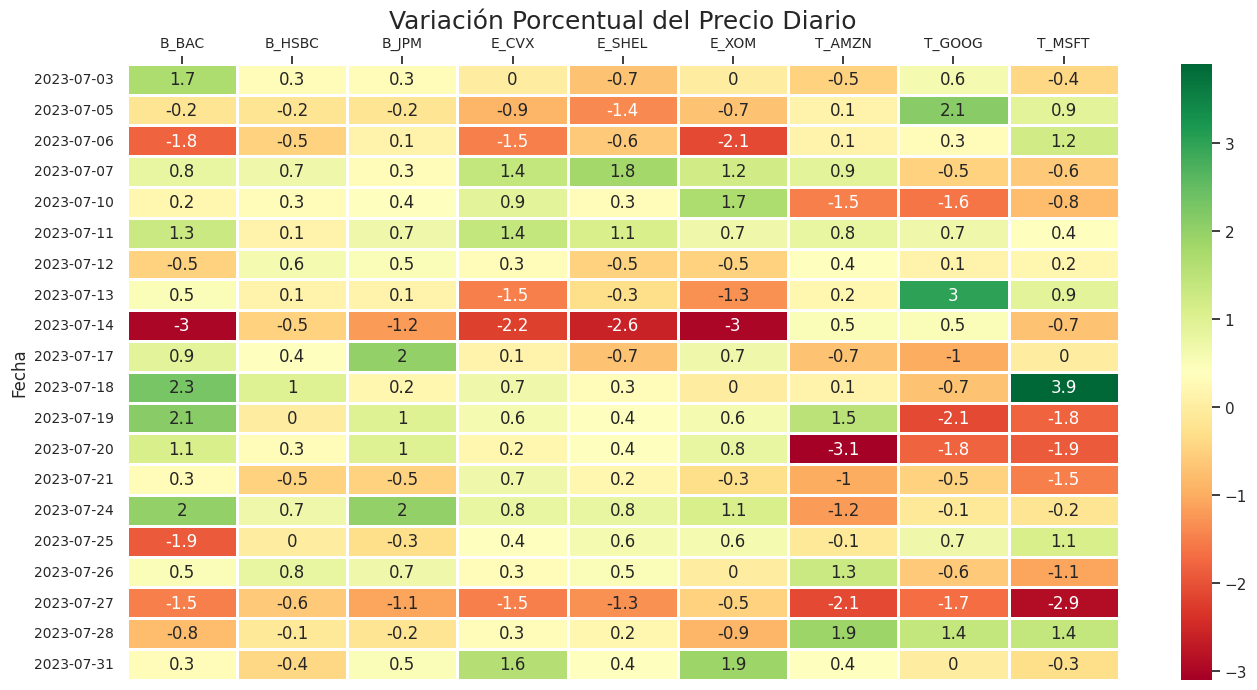

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(heatmap_pt, cmap='RdYlGn', annot=True, linecolor='white', linewidths=2 )


ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
ax.set(ylabel='Fecha', xlabel='')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.title('Variación Porcentual del Precio Diario',fontsize=18)

plt.show()

**Interacción**

In [ ]:
fig = px.imshow(heatmap_pt, text_auto=True)

#fig.update_layout(dict(yaxis = dict(type='date', tickformat="%Y-%m-%d",range = ['2023-07-03','2023-08-1'],nticks=21, tickfont=dict(size=10))))

fig.update_layout(dict(yaxis =dict(tickformat="%Y-%m-%d",showticklabels=True, nticks=21)))

fig.update_layout(title_text="Variación Porcentual del Precio Diario")

fig.show()

#se podrían ordenar los datos por fecha previamente

# **Gráfico de torta**

In [ ]:
DATA=pd.read_csv("/content/financials.csv")

 - 4 character variables:
        - Symbol: Ticker symbol used to uniquely identify each company on a particular stock market
        - Name: Legal name of the company
        - Sector: An area of the economy where businesses share a related product or service
        - SEC Filings: Helpful documents relating to a company

    - 10 numeric variables:
        - Price: Price per share of the company
        - Price to Earnings (PE): The ratio of a company’s share price to its earnings per share
        - Dividend Yield: The ratio of the annual dividends per share divided by the price per share
        - Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock
        - 52 week high and low: The annual high and low of a company’s share price
        - Market Cap: The market value of a company’s shares (calculated as share price x number of shares)
        - EBITDA: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability
        - Price to Sales (PS): A company’s market cap divided by its total sales or revenue over the past year
        - Price to Book (PB): A company’s price per share divided by its book value

In [ ]:
DATA.shape

(505, 14)

In [ ]:
DATA.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [ ]:
DATA_Sector=DATA.groupby(['Sector']).Price.agg(['count']).reset_index()
DATA_Sector

,Sector,count
0,Consumer Discretionary,84
1,Consumer Staples,34
2,Energy,32
3,Financials,68
4,Health Care,61
5,Industrials,67
6,Information Technology,70
7,Materials,25
8,Real Estate,33
9,Telecommunication Services,3


Con Matplotlib

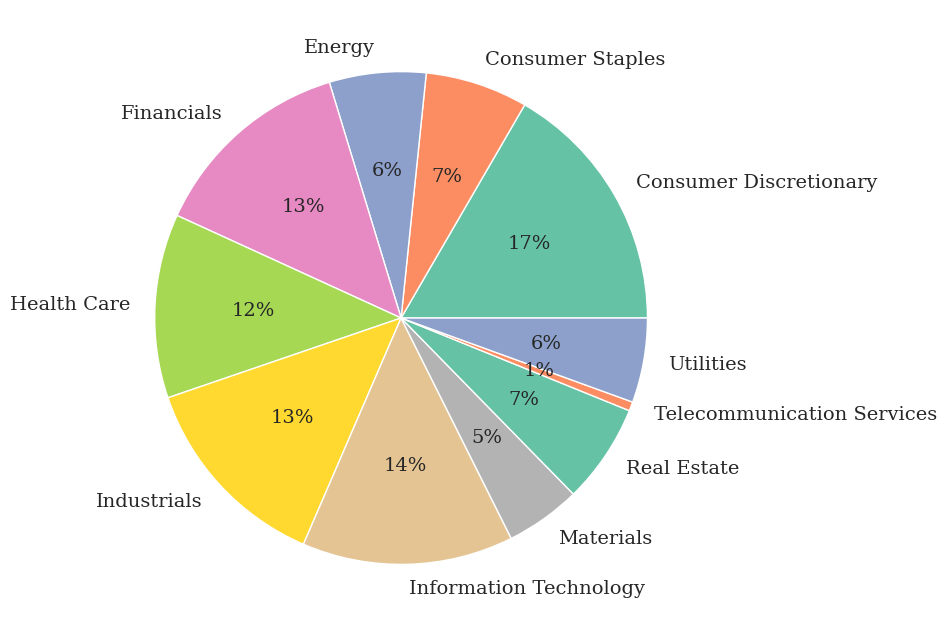

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

plt.pie(DATA_Sector["count"], labels = DATA_Sector["Sector"], autopct='%1.0f%%', textprops={'fontsize': 14})

plt.show()

Con Seaborn

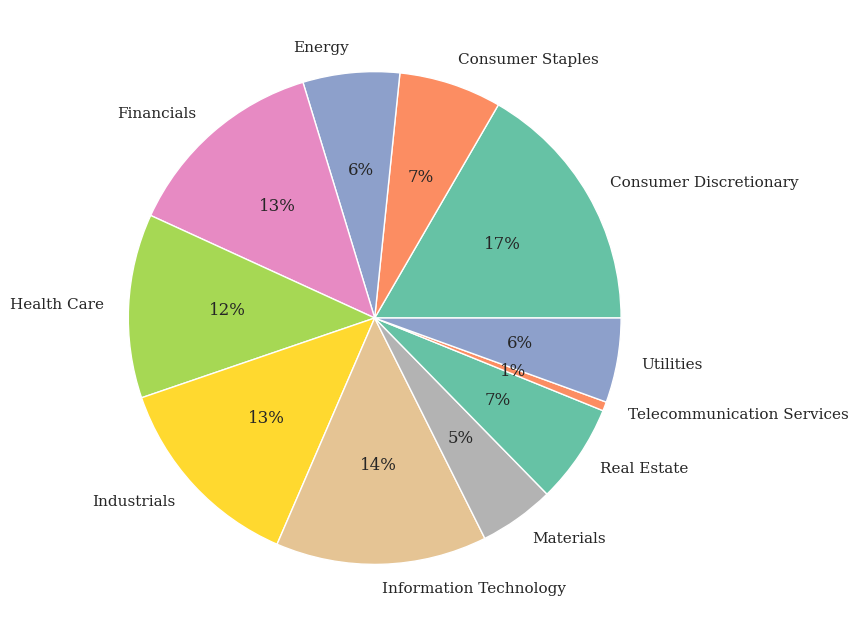

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

sns.set_theme(palette=sns.color_palette("Set2", 11), font="serif", font_scale= 1.0)

plt.pie(DATA_Sector["count"], labels=DATA_Sector["Sector"], autopct='%1.0f%%')

plt.show()

**Interacción**

In [ ]:
fig = px.pie(DATA_Sector, values='count', names='Sector')
fig.show()

# **Gráfico de Líneas**

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
DATA_YAHOO = pd.DataFrame(pdr.get_data_yahoo(['GOOGL','AMZN','MSFT','JPM','BAC','HSBC','XOM','CVX','SHEL'], start='2023-07-1', end='2023-08-01')[['Adj Close']]).reset_index()
DATA_YAHOO.columns=['FECHA','GOOG_AC','AMZN_AC','MSFT_AC','JPM_AC','BAC_AC','HSBC_AC','XOM_AC','CVX_AC','SHEL_AC']
DATA_YAHOO = DATA_YAHOO.set_index('FECHA')
DATA_YAHOO

[*********************100%%**********************]  9 of 9 completed


,GOOG_AC,AMZN_AC,MSFT_AC,JPM_AC,BAC_AC,HSBC_AC,XOM_AC,CVX_AC,SHEL_AC
FECHA,,,,,,,,,
2023-07-03,130.220001,28.958677,155.713531,119.900002,39.460297,145.610001,337.275909,60.215580,106.586266
2023-07-05,130.380005,28.839668,154.822083,121.750000,39.084953,144.639999,337.435577,59.226170,106.040741
2023-07-06,128.360001,28.046282,151.424744,120.110001,38.521942,143.210007,340.548981,57.910248,102.083176
2023-07-07,129.779999,28.294214,152.751984,119.480003,38.788631,144.339996,336.507538,59.018391,102.321228
2023-07-10,127.129997,28.423140,153.772171,116.449997,38.610836,145.149994,331.128906,59.285530,103.838791
2023-07-11,128.779999,28.780165,156.614853,117.139999,38.571327,147.419998,331.767578,60.225471,105.108383
2023-07-12,130.800003,29.117355,158.120392,118.930000,39.598579,148.149994,336.487579,61.135731,105.624153
2023-07-13,134.300003,29.424793,156.010666,124.540001,40.052940,148.869995,341.936035,61.452343,103.690010
2023-07-14,134.679993,28.869421,152.118073,125.419998,39.865269,149.770004,344.510590,60.037483,100.119278


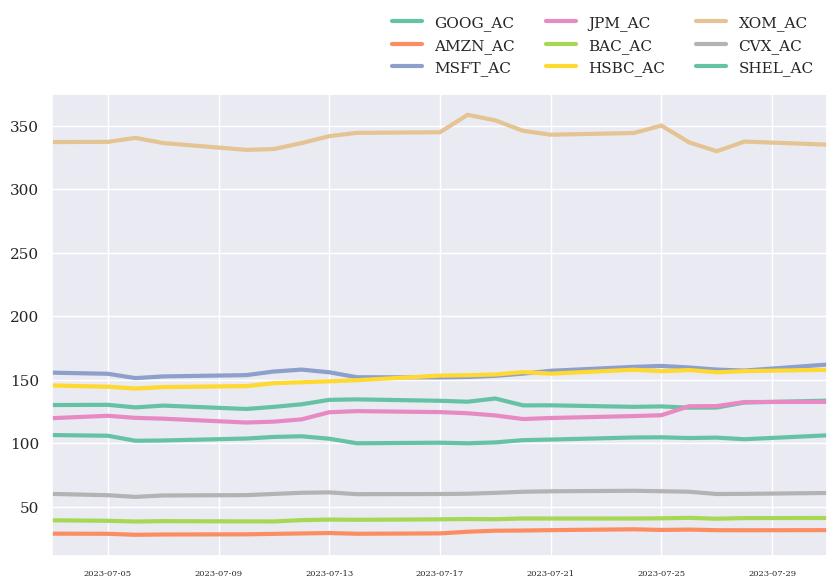

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for col in ['GOOG_AC','AMZN_AC','MSFT_AC','JPM_AC','BAC_AC','HSBC_AC','XOM_AC','CVX_AC','SHEL_AC']:
    plt.plot(DATA_YAHOO.index, DATA_YAHOO[col], linestyle='solid', linewidth=3)

plt.xticks(rotation=0, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())

plt.legend(labels=['GOOG_AC','AMZN_AC','MSFT_AC','JPM_AC','BAC_AC','HSBC_AC','XOM_AC','CVX_AC','SHEL_AC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.show()

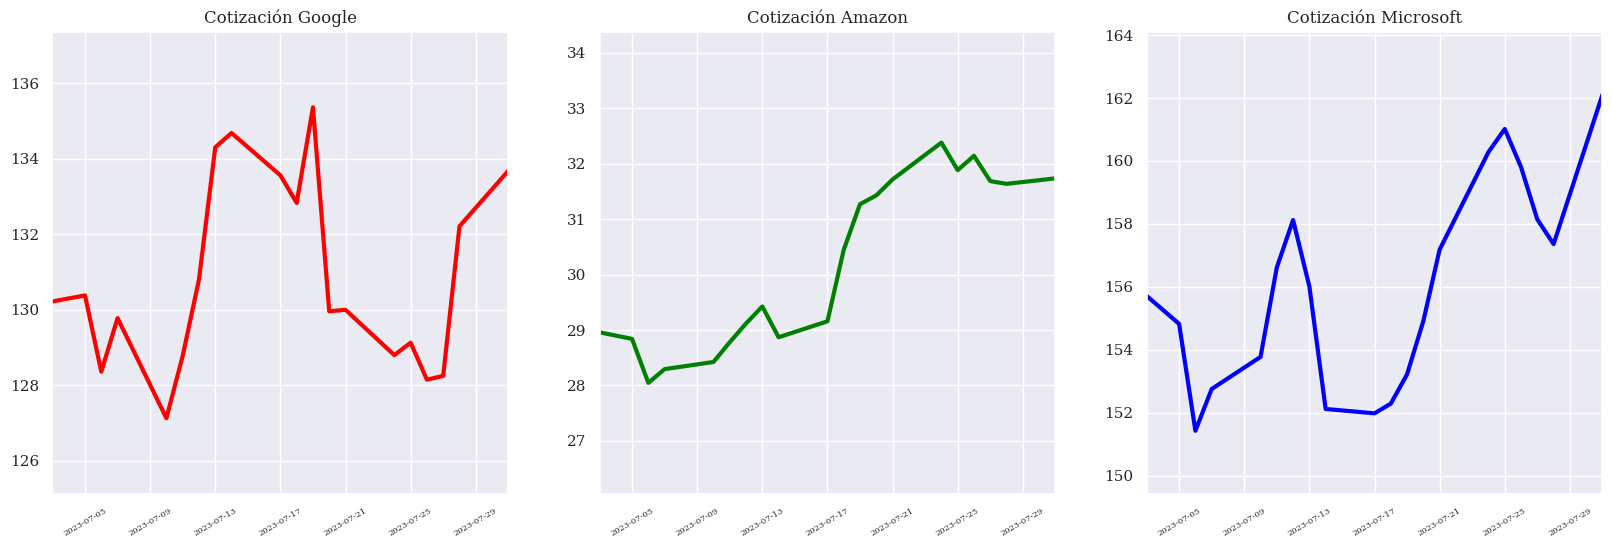

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['GOOG_AC'], linestyle='solid', linewidth=3, color='red')
plt.xticks(rotation=30, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
plt.ylim(DATA_YAHOO['GOOG_AC'].min()-2,DATA_YAHOO['GOOG_AC'].max()+2)
plt.title('Cotización Google')

plt.subplot(1,3,2)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['AMZN_AC'], linestyle='solid', linewidth=3, color='green')
plt.xticks(rotation=30, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
plt.ylim(DATA_YAHOO['AMZN_AC'].min()-2,DATA_YAHOO['AMZN_AC'].max()+2)
plt.title('Cotización Amazon')

plt.subplot(1,3,3)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['MSFT_AC'], linestyle='solid', linewidth=3, color='blue')
plt.xticks(rotation=30, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
plt.ylim(DATA_YAHOO['MSFT_AC'].min()-2,DATA_YAHOO['MSFT_AC'].max()+2)
plt.title('Cotización Microsoft')

plt.show()

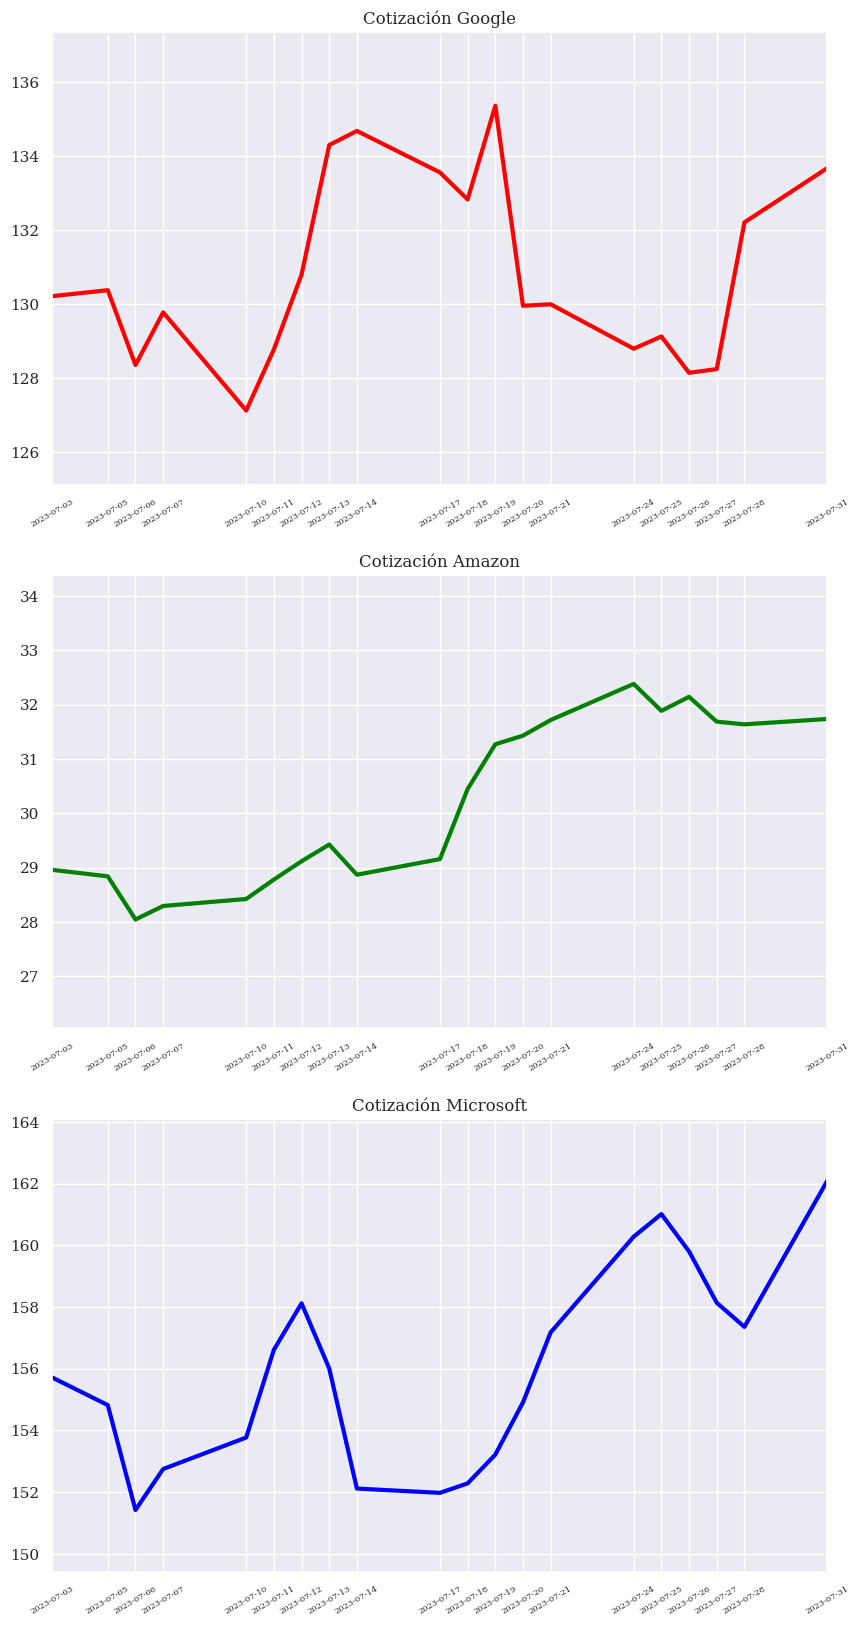

In [ ]:

fig, ax = plt.subplots(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['GOOG_AC'], linestyle='solid', linewidth=3, color='red')
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks,rotation=30, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
plt.ylim(DATA_YAHOO['GOOG_AC'].min()-2,DATA_YAHOO['GOOG_AC'].max()+2)
plt.ylim(DATA_YAHOO['GOOG_AC'].min()-2,DATA_YAHOO['GOOG_AC'].max()+2)
plt.title('Cotización Google')

plt.subplot(3,1,2)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['AMZN_AC'], linestyle='solid', linewidth=3, color='green')
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks,rotation=30, fontsize=6)
plt.ylim(DATA_YAHOO['AMZN_AC'].min()-2,DATA_YAHOO['AMZN_AC'].max()+2)
plt.title('Cotización Amazon')

plt.subplot(3,1,3)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['MSFT_AC'], linestyle='solid', linewidth=3, color='blue')
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks,rotation=30, fontsize=6)
plt.ylim(DATA_YAHOO['MSFT_AC'].min()-2,DATA_YAHOO['MSFT_AC'].max()+2)
plt.title('Cotización Microsoft')

plt.show()

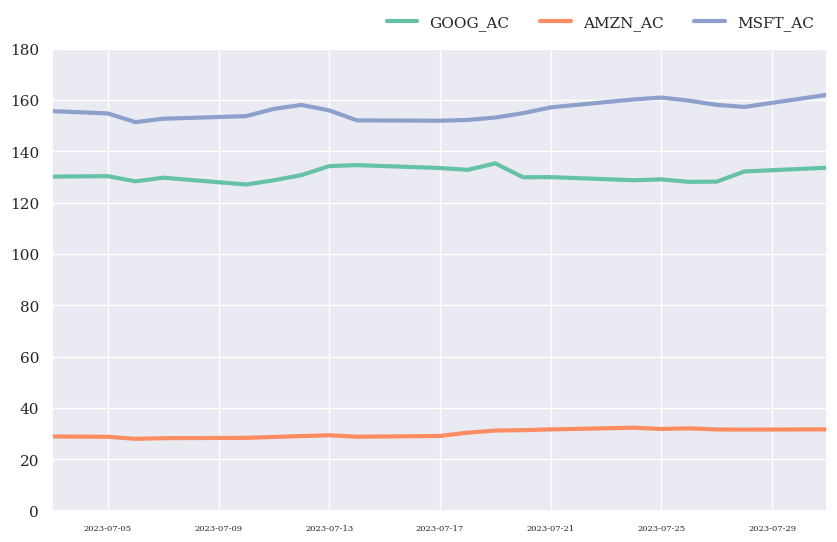

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for col in ['GOOG_AC', 'AMZN_AC', 'MSFT_AC']:
    plt.plot(DATA_YAHOO.index, DATA_YAHOO[col], linestyle='solid', linewidth=3)


plt.xticks(rotation=0, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())

plt.ylim(0,180)

plt.legend(labels=['GOOG_AC', 'AMZN_AC', 'MSFT_AC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.show()

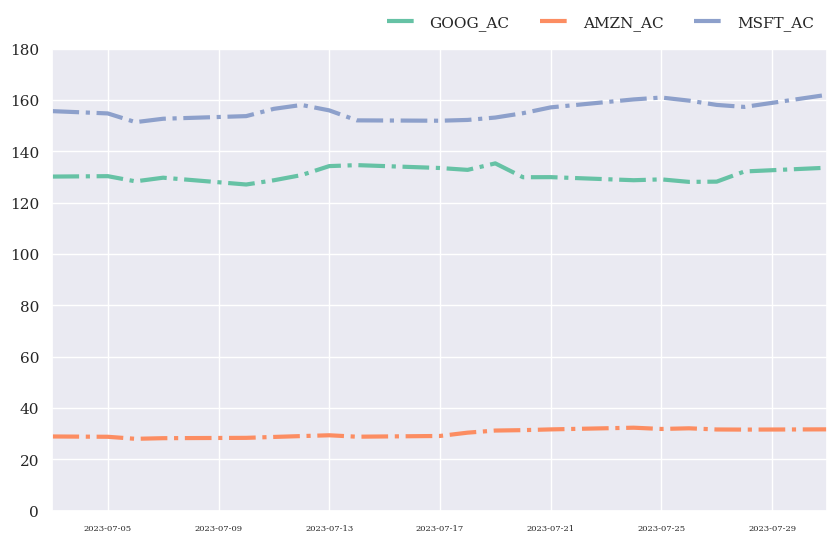

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

for col in ['GOOG_AC', 'AMZN_AC', 'MSFT_AC']:
    plt.plot(DATA_YAHOO.index, DATA_YAHOO[col], linestyle='dashdot', linewidth=3)

plt.xticks(rotation=0, fontsize=6)
plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())

plt.ylim(0,180)

plt.legend(labels=['GOOG_AC', 'AMZN_AC', 'MSFT_AC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.show()

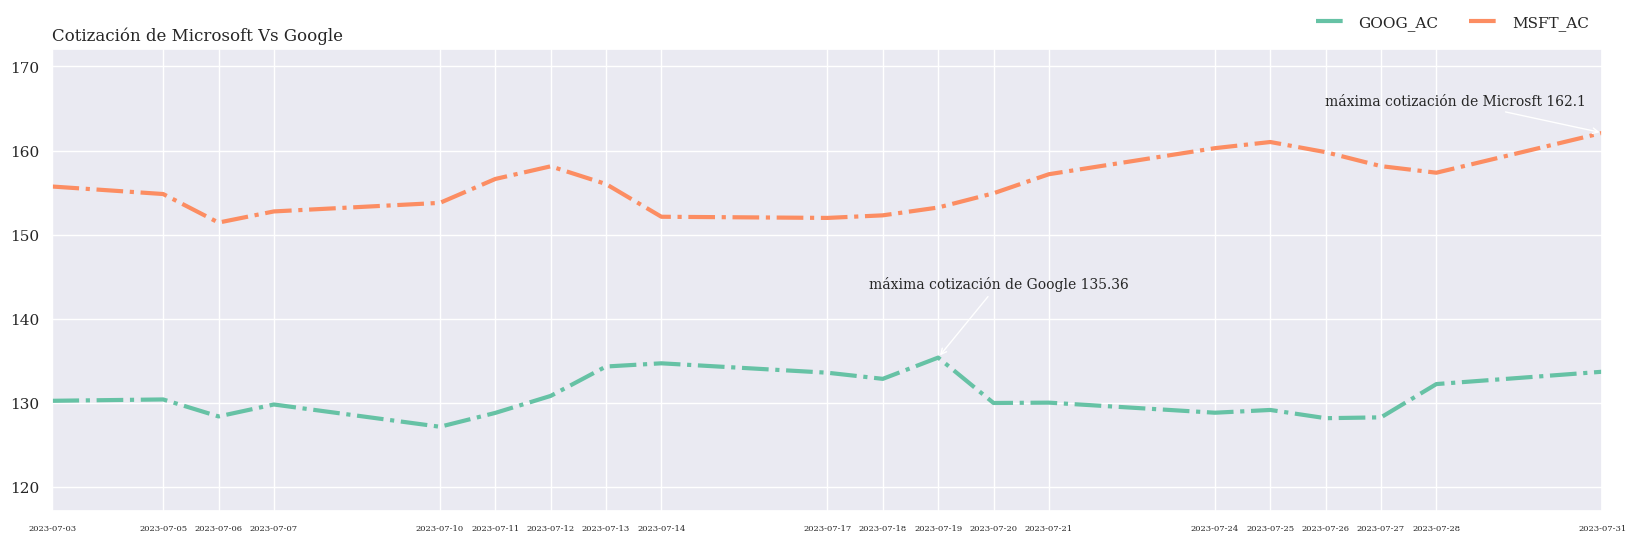

In [ ]:

fig, ax = plt.subplots(figsize=(20,6))


for col in ['GOOG_AC', 'MSFT_AC']:
    plt.plot(DATA_YAHOO.index, DATA_YAHOO[col], linestyle='dashdot', linewidth=3)

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)

plt.ylim(DATA_YAHOO['GOOG_AC'].min()-10,DATA_YAHOO['MSFT_AC'].max()+10)

plt.legend(labels=['GOOG_AC', 'MSFT_AC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.title('Cotización de Microsoft Vs Google', loc='left')


#señalar un punto con comentario
plt.annotate('máxima cotización de Google'+' '+str(round(DATA_YAHOO['GOOG_AC'].max(),2)), xy=(datetime(2023, 7, 19), DATA_YAHOO['GOOG_AC'].max()),
             xycoords='data',xytext=(-50, +50),
             textcoords='offset points',
             fontsize=10,
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0')
            )

plt.annotate('máxima cotización de Microsft'+' '+str(round(DATA_YAHOO['MSFT_AC'].max(),2)), xy=(datetime(2023, 7, 31), DATA_YAHOO['MSFT_AC'].max()),
             xycoords='data',xytext=(-200, +20),
             textcoords='offset points',
             fontsize=10,
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0')
            )

plt.show()

In [ ]:
DATA_YAHOO['GOOG_AC'].max()

135.36000061035156

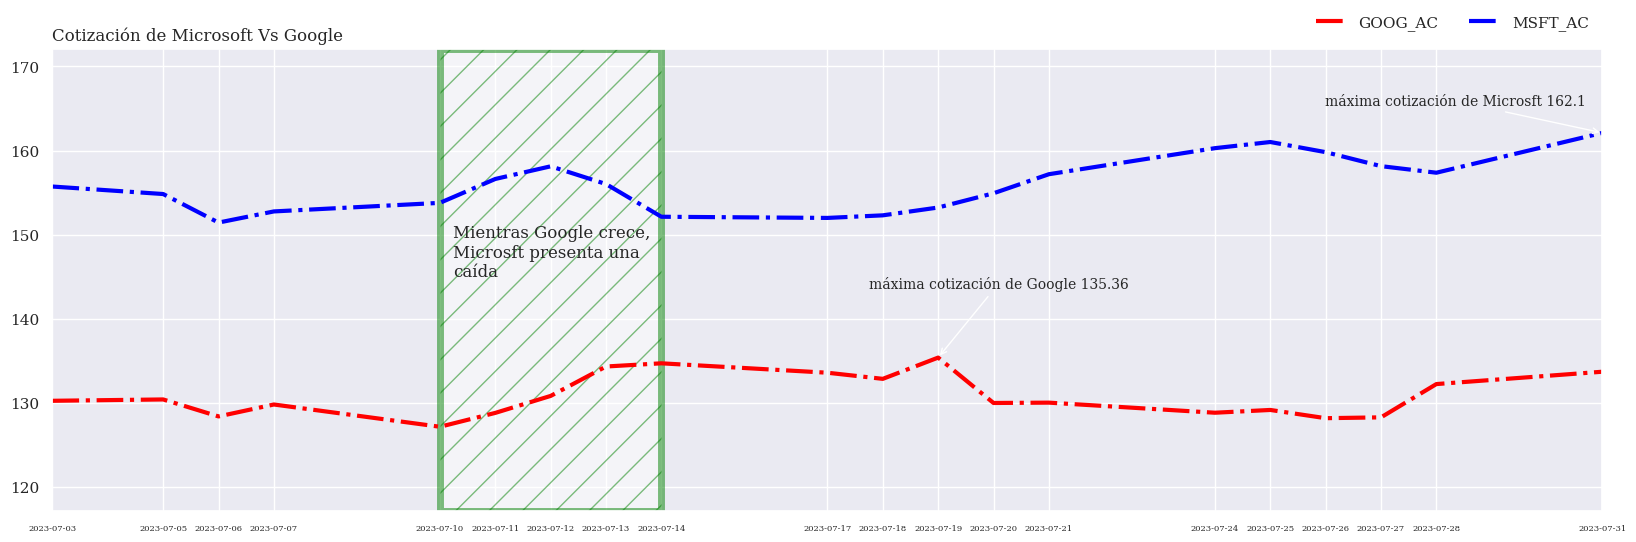

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

plt.plot(DATA_YAHOO.index, DATA_YAHOO['GOOG_AC'], linestyle='dashdot', linewidth=3, color='red')
plt.plot(DATA_YAHOO.index, DATA_YAHOO['MSFT_AC'], linestyle='dashdot', linewidth=3, color='blue')

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)

plt.ylim(DATA_YAHOO['GOOG_AC'].min()-10,DATA_YAHOO['MSFT_AC'].max()+10)

plt.legend(labels=['GOOG_AC', 'MSFT_AC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.title('Cotización de Microsoft Vs Google', loc='left')

#señalar un punto con comentario
plt.annotate('máxima cotización de Google'+' '+str(round(DATA_YAHOO['GOOG_AC'].max(),2)), xy=(datetime(2023, 7, 19), DATA_YAHOO['GOOG_AC'].max()),
             xycoords='data',xytext=(-50, +50),
             textcoords='offset points',
             fontsize=10,
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0')
            )

plt.annotate('máxima cotización de Microsft'+' '+str(round(DATA_YAHOO['MSFT_AC'].max(),2)), xy=(datetime(2023, 7, 31), DATA_YAHOO['MSFT_AC'].max()),
             xycoords='data',xytext=(-200, +20),
             textcoords='offset points',
             fontsize=10,
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0')
            )

#destacar un período
from datetime import datetime
plt.axvspan(datetime(2023, 7, 10), datetime(2023, 7, 14), facecolor='white', alpha=0.5, hatch='/', edgecolor='green', linewidth=5)

#agregar un comentario a lo anterior
plt.annotate('Mientras Google crece,'+'\n'+'Microsft presenta una'+'\n'+'caída', xy=(datetime(2023, 7, 12), 145),
             xycoords='data',xytext=(-70, 0),
             textcoords='offset points',
             fontsize=12
            )

plt.show()

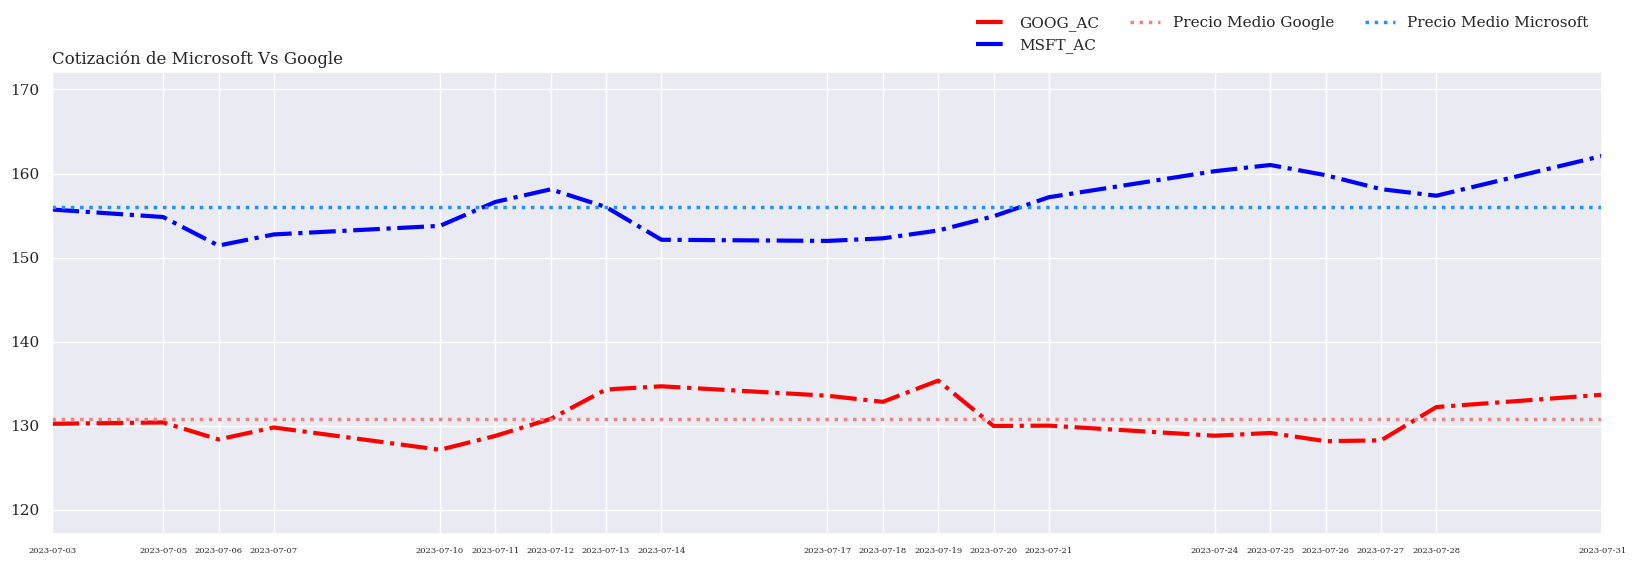

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

plt.plot(DATA_YAHOO.index, DATA_YAHOO['GOOG_AC'], linestyle='dashdot', linewidth=3, color='red')
plt.plot(DATA_YAHOO.index, DATA_YAHOO['MSFT_AC'], linestyle='dashdot', linewidth=3, color='blue')

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)

plt.ylim(DATA_YAHOO['GOOG_AC'].min()-10,DATA_YAHOO['MSFT_AC'].max()+10)

#se agrega la media en cada caso
plt.axhline(DATA_YAHOO['GOOG_AC'].mean(), color = 'lightcoral', linestyle='dotted', lw= 2.5, label = 'Precio Medio Google') #media de Google
plt.axhline(DATA_YAHOO['MSFT_AC'].mean(), color = 'dodgerblue', linestyle='dotted', lw= 2.5, label = 'Precio Medio Microsft') #media de Microsoft

plt.legend(labels=['GOOG_AC', 'MSFT_AC', 'Precio Medio Google', 'Precio Medio Microsoft'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.title('Cotización de Microsoft Vs Google', loc='left')

plt.grid(True)

plt.show()

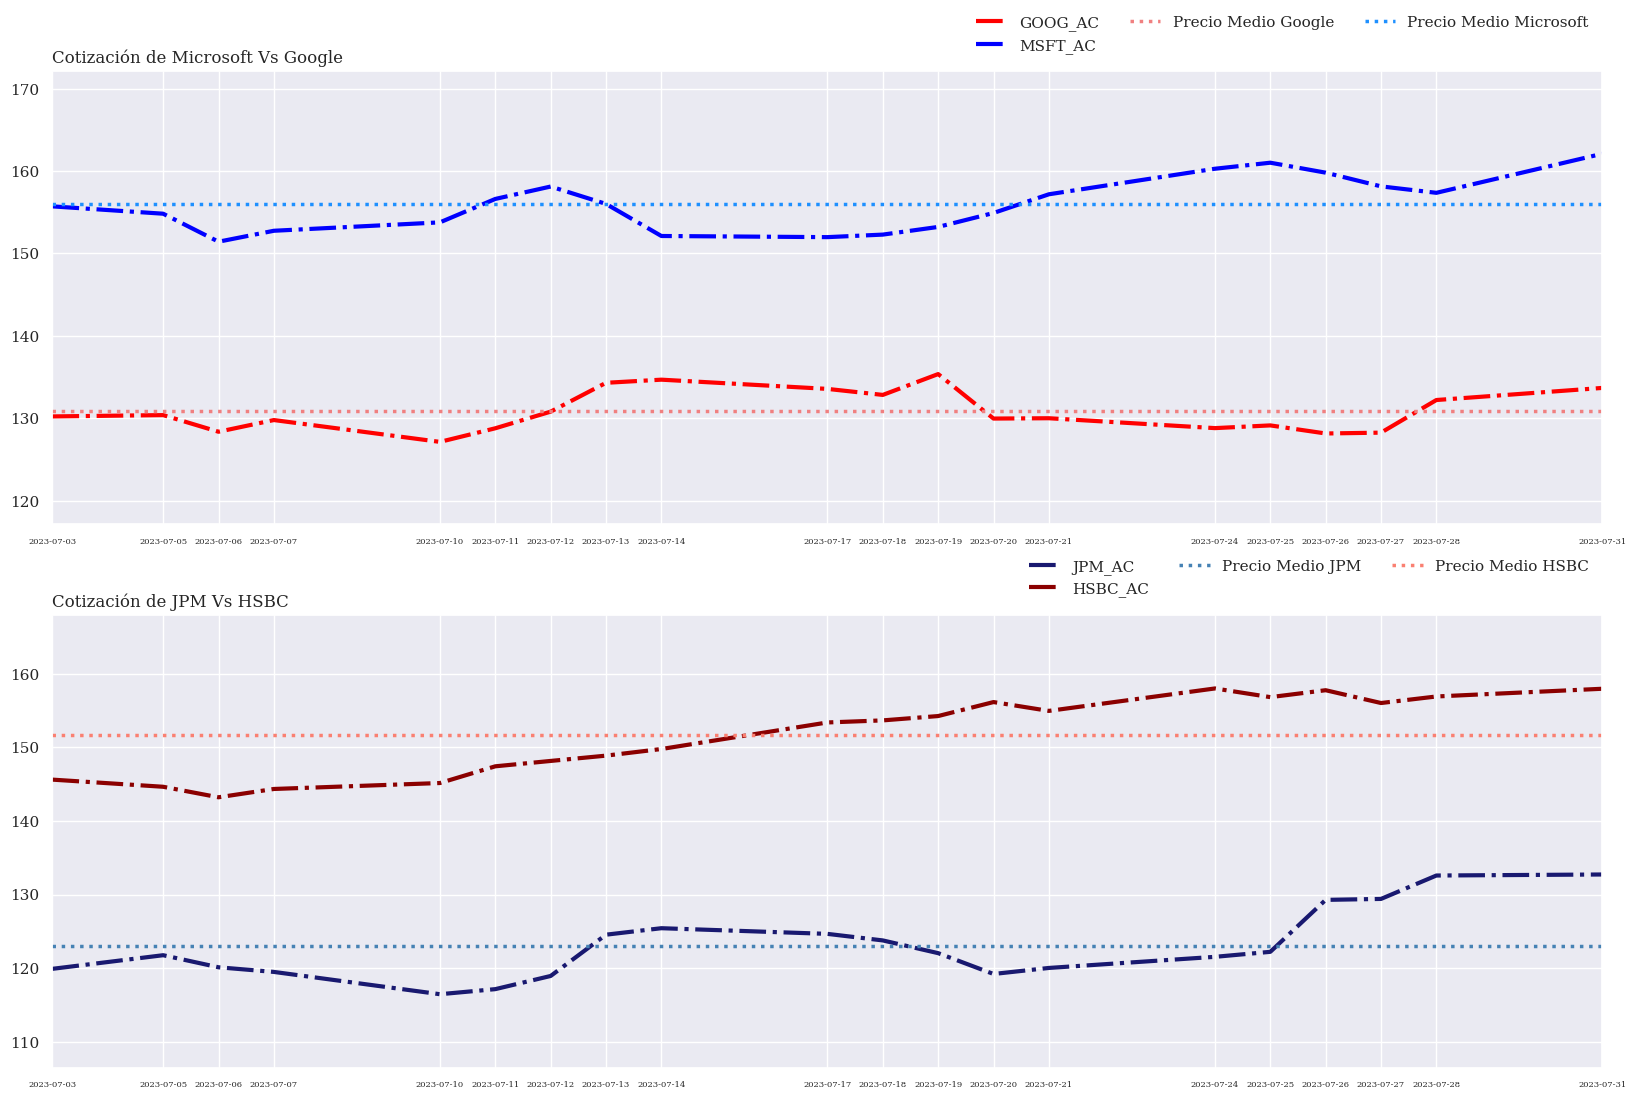

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))

plt.subplot(3,1,1)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['GOOG_AC'], linestyle='dashdot', linewidth=3, color='red')
plt.plot(DATA_YAHOO.index, DATA_YAHOO['MSFT_AC'], linestyle='dashdot', linewidth=3, color='blue')
#se agrega la media en cada caso
plt.axhline(DATA_YAHOO['GOOG_AC'].mean(), color = 'lightcoral', linestyle='dotted', lw= 2.5, label = 'Precio Medio Google') #media de Google
plt.axhline(DATA_YAHOO['MSFT_AC'].mean(), color = 'dodgerblue', linestyle='dotted', lw= 2.5, label = 'Precio Medio Microsft') #media de Microsoft

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)
plt.legend(labels=['GOOG_AC', 'MSFT_AC', 'Precio Medio Google', 'Precio Medio Microsoft'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)
plt.ylim(DATA_YAHOO['GOOG_AC'].min()-10,DATA_YAHOO['MSFT_AC'].max()+10)
plt.title('Cotización de Microsoft Vs Google', loc='left')
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(DATA_YAHOO.index, DATA_YAHOO['JPM_AC'], linestyle='dashdot', linewidth=3, color='midnightblue')
plt.plot(DATA_YAHOO.index, DATA_YAHOO['HSBC_AC'], linestyle='dashdot', linewidth=3, color='darkred')
#se agrega la media en cada caso
plt.axhline(DATA_YAHOO['JPM_AC'].mean(), color = 'steelblue', linestyle='dotted', lw= 2.5, label = 'Precio Medio JPM') #media de JPM
plt.axhline(DATA_YAHOO['HSBC_AC'].mean(), color = 'salmon', linestyle='dotted', lw= 2.5, label = 'Precio Medio HSBC') #media de HSBC

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)
plt.legend(labels=['JPM_AC', 'HSBC_AC', 'Precio Medio JPM', 'Precio Medio HSBC'], ncol=3, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)
plt.ylim(DATA_YAHOO['JPM_AC'].min()-10,DATA_YAHOO['HSBC_AC'].max()+10)
plt.title('Cotización de JPM Vs HSBC', loc='left')
plt.grid(True)

plt.show()

Con Seaborn

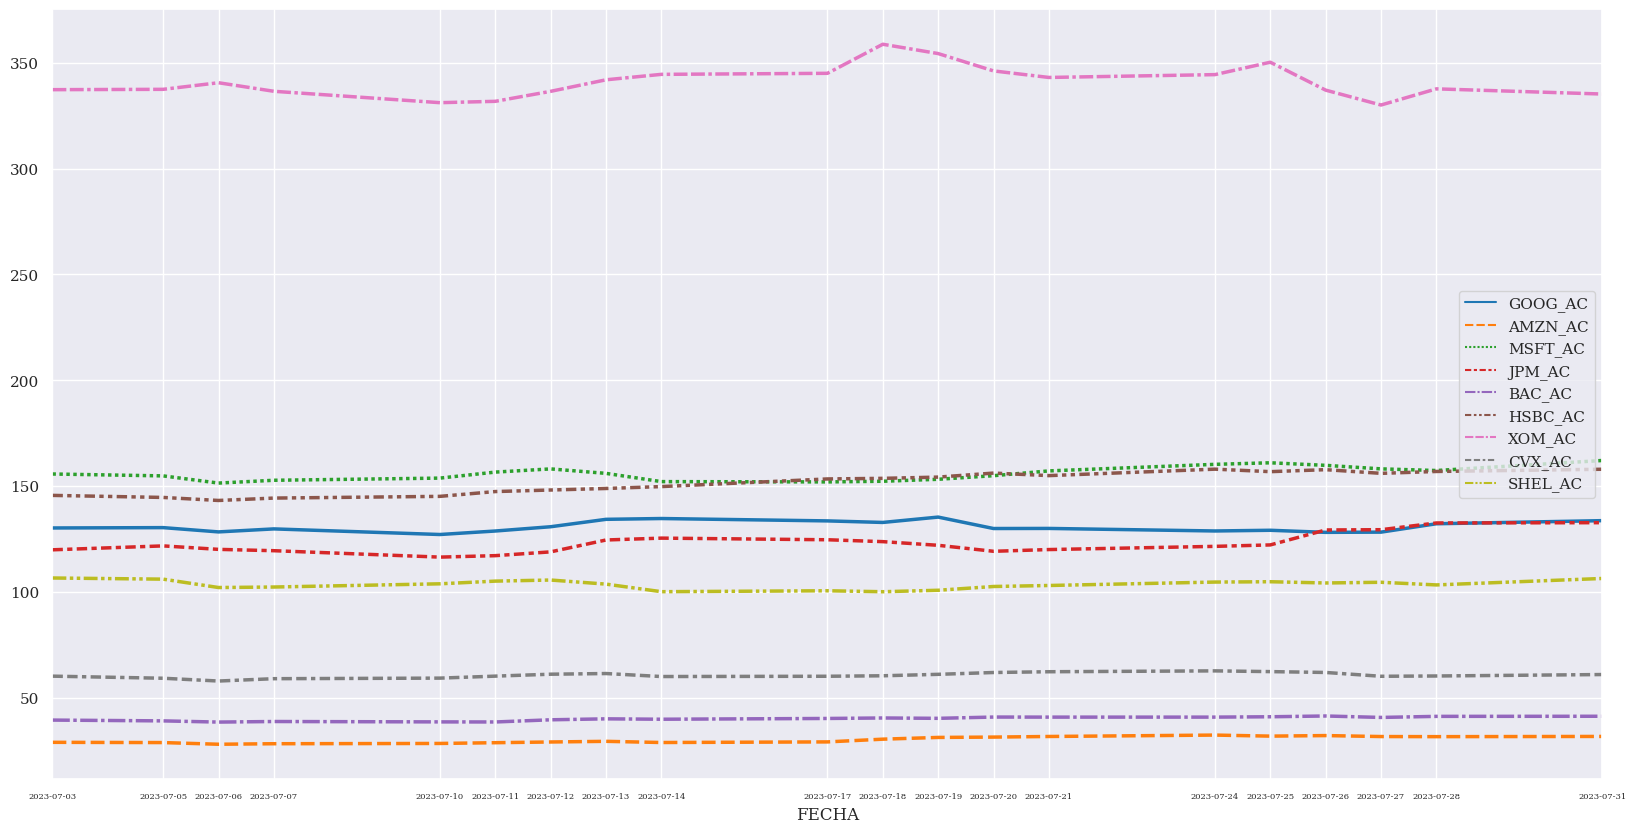

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=DATA_YAHOO, palette="tab10", linewidth=2.5)

plt.legend(loc='center right')

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)

plt.grid(True)

In [ ]:
DATA_YAHOO.head()

,GOOG_AC,AMZN_AC,MSFT_AC,JPM_AC,BAC_AC,HSBC_AC,XOM_AC,CVX_AC,SHEL_AC
FECHA,,,,,,,,,
2023-07-03,130.220001,28.958677,155.713531,119.900002,39.460297,145.610001,337.275909,60.215580,106.586266
2023-07-05,130.380005,28.839668,154.822083,121.750000,39.084953,144.639999,337.435577,59.226170,106.040741
2023-07-06,128.360001,28.046282,151.424744,120.110001,38.521942,143.210007,340.548981,57.910248,102.083176
2023-07-07,129.779999,28.294214,152.751984,119.480003,38.788631,144.339996,336.507538,59.018391,102.321228
2023-07-10,127.129997,28.423140,153.772171,116.449997,38.610836,145.149994,331.128906,59.285530,103.838791


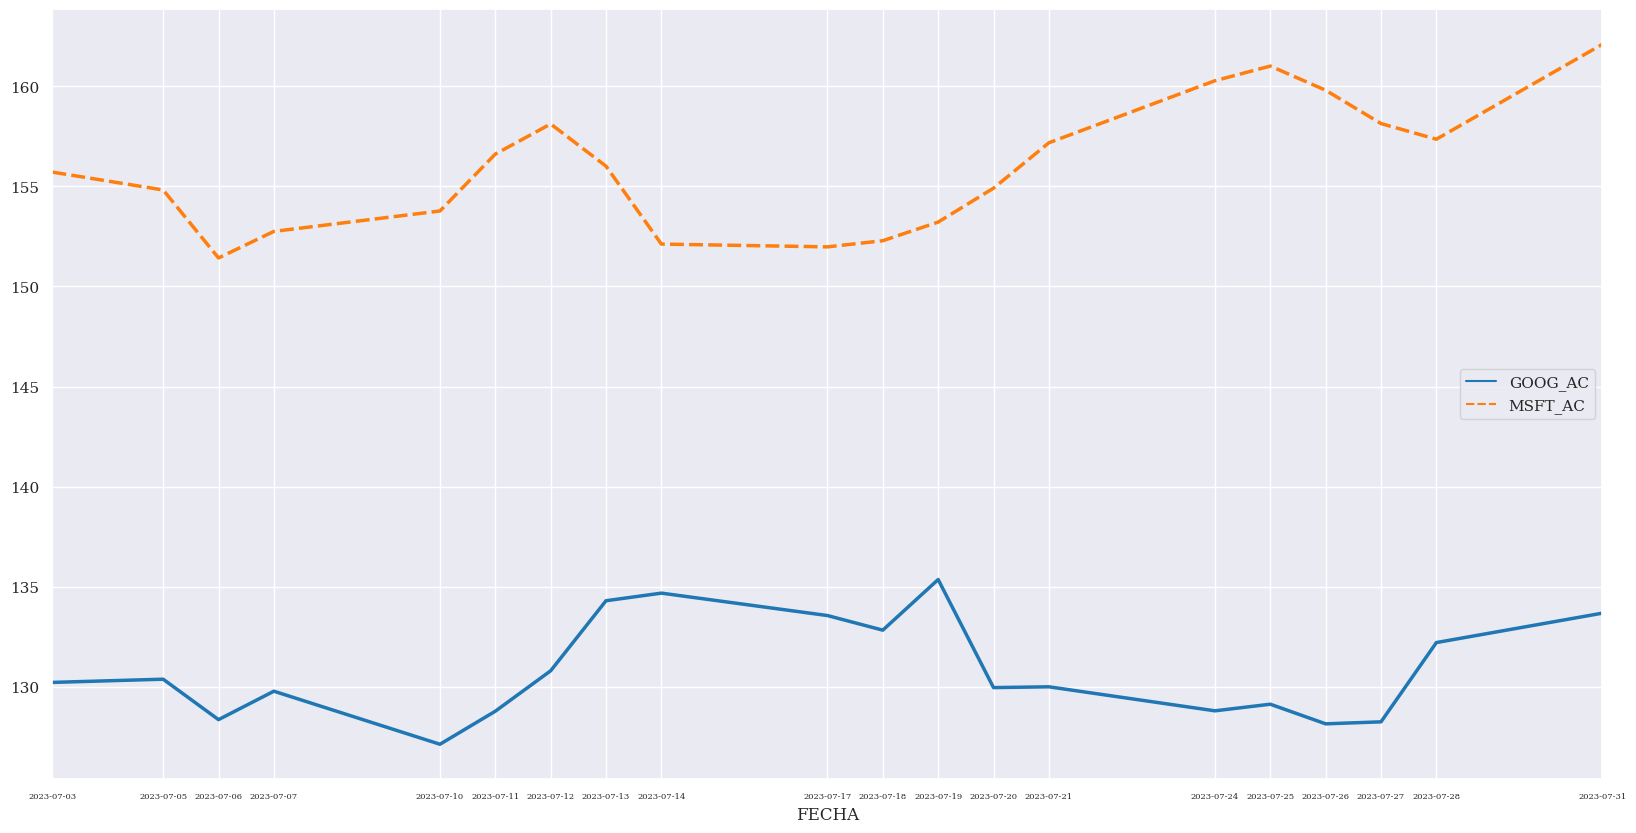

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=DATA_YAHOO[['GOOG_AC', 'MSFT_AC']], palette="tab10", linewidth=2.5)

plt.xlim(DATA_YAHOO.index.min(), DATA_YAHOO.index.max())
ticks = list(DATA_YAHOO.index)
plt.xticks(ticks, rotation=0, fontsize=6)

plt.legend(loc='center right')

plt.grid(True)

**Interacción**

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Datos_GOOG = pd.DataFrame(pdr.get_data_yahoo('GOOGL', start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_GOOG=Datos_GOOG.assign(SYMBOL_YAHOO_FINANCE='T_GOOG', SECTOR='TECNOLOGIA')
Datos_AMZN = pd.DataFrame(pdr.get_data_yahoo('AMZN',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_AMZN=Datos_AMZN.assign(SYMBOL_YAHOO_FINANCE='T_AMZN', SECTOR='TECNOLOGIA')
Datos_MSFT = pd.DataFrame(pdr.get_data_yahoo('MSFT',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_MSFT=Datos_MSFT.assign(SYMBOL_YAHOO_FINANCE='T_MSFT', SECTOR='TECNOLOGIA')

Datos_JPM = pd.DataFrame(pdr.get_data_yahoo('JPM',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_JPM=Datos_JPM.assign(SYMBOL_YAHOO_FINANCE='B_JPM', SECTOR='BANCARIO')
Datos_BAC = pd.DataFrame(pdr.get_data_yahoo('BAC',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_BAC=Datos_BAC.assign(SYMBOL_YAHOO_FINANCE='B_BAC', SECTOR='BANCARIO')
Datos_HSBC = pd.DataFrame(pdr.get_data_yahoo('HSBC',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_HSBC=Datos_HSBC.assign(SYMBOL_YAHOO_FINANCE='B_HSBC', SECTOR='BANCARIO')

Datos_EXXON = pd.DataFrame(pdr.get_data_yahoo('XOM',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_EXXON=Datos_EXXON.assign(SYMBOL_YAHOO_FINANCE='E_XOM', SECTOR='ENERGIA')
Datos_CHEV = pd.DataFrame(pdr.get_data_yahoo('CVX',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_CHEV=Datos_CHEV.assign(SYMBOL_YAHOO_FINANCE='E_CVX', SECTOR='ENERGIA')
Datos_SHEL = pd.DataFrame(pdr.get_data_yahoo('SHEL',  start='2022-06-1', end='2023-08-01', interval='1mo')[['Adj Close']]).reset_index()
Datos_SHEL=Datos_SHEL.assign(SYMBOL_YAHOO_FINANCE='E_SHEL', SECTOR='ENERGIA')


#GENERACIÓN DE UN SOLO DATAFRAME
DATA_YAHOO_M=Datos_GOOG.append([Datos_AMZN, Datos_MSFT,Datos_JPM,Datos_BAC,Datos_HSBC,Datos_EXXON,Datos_CHEV,Datos_SHEL])
#RESETEO DE INDICE
DATA_YAHOO_M.reset_index(drop=True, inplace=True)
DATA_YAHOO_M

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,Adj Close,SYMBOL_YAHOO_FINANCE,SECTOR
0,2022-06-01,108.962997,T_GOOG,TECNOLOGIA
1,2022-07-01,116.320000,T_GOOG,TECNOLOGIA
2,2022-08-01,108.220001,T_GOOG,TECNOLOGIA
3,2022-09-01,95.650002,T_GOOG,TECNOLOGIA
4,2022-10-01,94.510002,T_GOOG,TECNOLOGIA
...,...,...,...,...
121,2023-03-01,56.392239,E_SHEL,ENERGIA
122,2023-04-01,60.743671,E_SHEL,ENERGIA
123,2023-05-01,54.882954,E_SHEL,ENERGIA
124,2023-06-01,59.740662,E_SHEL,ENERGIA


In [ ]:
fig = px.line(DATA_YAHOO_M, x="Date", y="Adj Close", color='SYMBOL_YAHOO_FINANCE')
fig.update_layout(dict(xaxis = dict( type='date', tickformat="%Y-%m-%d",range = ['2022-06-01','2023-07-1'],nticks=13,tickfont=dict(size=8))))
fig.update_layout(template='none')
fig.show()

In [ ]:
fig = px.line(DATA_YAHOO_M[DATA_YAHOO_M['SECTOR']=='TECNOLOGIA'], x="Date", y="Adj Close", color='SYMBOL_YAHOO_FINANCE')
fig.update_layout(dict(xaxis = dict( type='date', tickformat="%Y-%m-%d",range = ['2022-06-01','2023-07-1'],nticks=13,tickfont=dict(size=8))))
fig.update_layout(template='none')
fig.show()

In [ ]:
fig = px.line(DATA_YAHOO_M[DATA_YAHOO_M['SECTOR']=='TECNOLOGIA'], x="Date", y="Adj Close", color='SYMBOL_YAHOO_FINANCE',
              symbol="SYMBOL_YAHOO_FINANCE",symbol_map={"T_GOOG": "circle", "T_AMZN": "triangle-up", "T_MSFT": "diamond"})
fig.update_layout(dict(xaxis = dict( type='date', tickformat="%Y-%m-%d",range = ['2022-06-01','2023-07-1'],nticks=13,tickfont=dict(size=8))))
fig.update_layout(template='none')
fig.show()